In [1]:
import pyqg_subgrid_experiments as pse
from Vanilla_vae import Vanilla_VAEModel
from Conditional_vae import CVAEModel
import matplotlib.pyplot as plt
import json
import xarray as xr
import matplotlib.image as mpimg
from plot_helpers import *
%load_ext autoreload
%autoreload 2

/home/pp2681/pyqg_experiments/pyqg_subgrid_experiments/__init__.py:14: UserWarning: Unable to load gplearn_helpers, install gplearn if you want to use these
  warnings.warn("Unable to load gplearn_helpers, install gplearn if you want to use these")
/home/pp2681/pyqg_experiments/pyqg_subgrid_experiments/__init__.py:19: UserWarning: Unable to load differentiable_parameterizations, install autograd if you want to use these
  warnings.warn("Unable to load differentiable_parameterizations, install autograd if you want to use these")


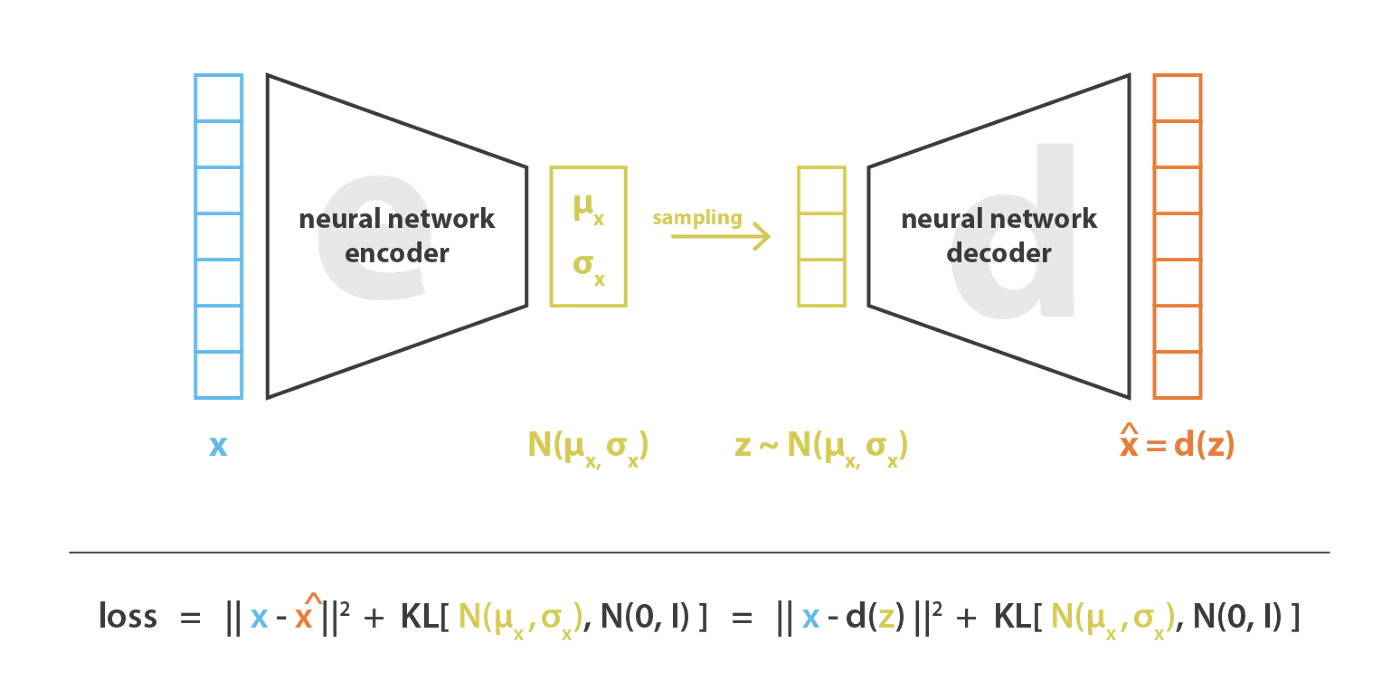

In [2]:
folder = '/scratch/pp2681/pyqg_NN/KE/'
exps = ('EXP1', 'EXP2', 'EXP3', 'EXP4', 'EXP5', 'EXP6', 'EXP7', 'EXP8', 'EXP9', 'EXP10')

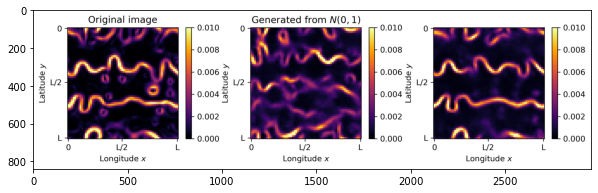

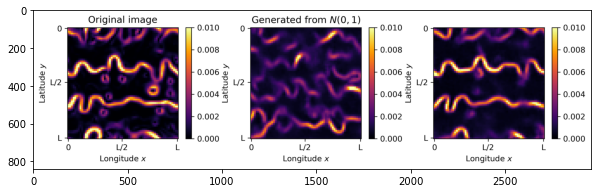

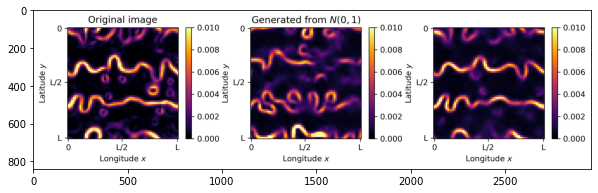

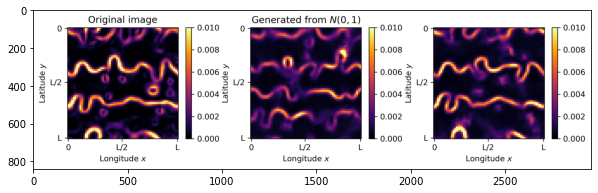

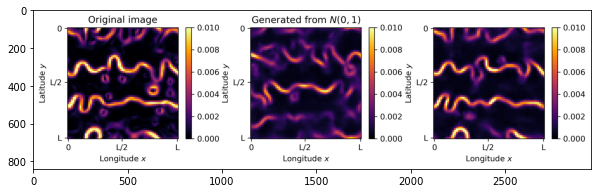

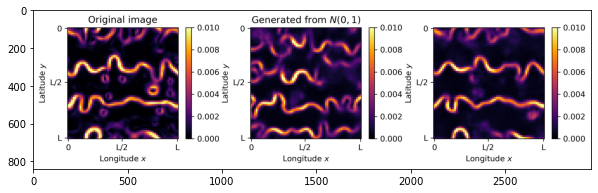

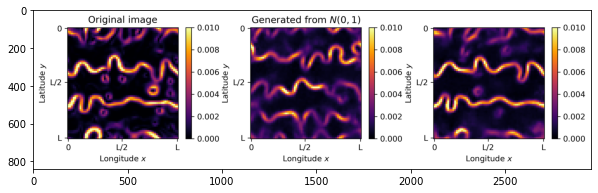

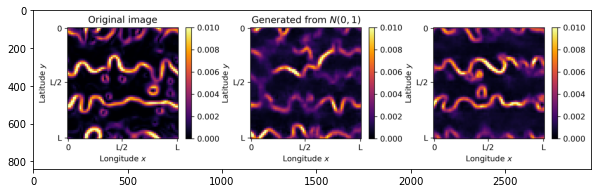

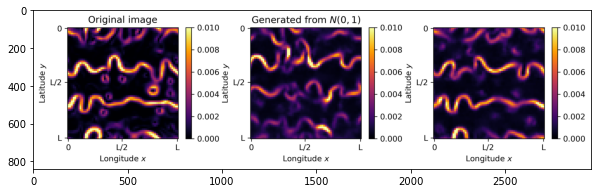

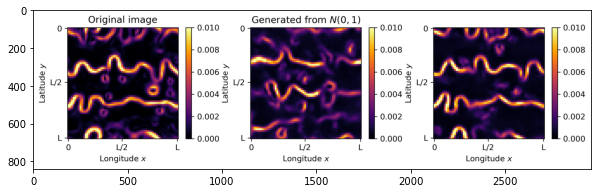

EXP1 {'n_latent': 128, 'num_epochs': 200, 'var_channel': 'logstd', 'decoder_var': 'adaptive', 'folder': '.'}
EXP2 {'n_latent': 128, 'num_epochs': 200, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'folder': '.'}
EXP3 {'n_latent': 128, 'num_epochs': 200, 'var_channel': 'splus_std', 'decoder_var': 'adaptive', 'folder': '.'}
EXP4 {'n_latent': 128, 'num_epochs': 200, 'var_channel': 'splus_var', 'decoder_var': 'adaptive', 'folder': '.'}
EXP5 {'n_latent': 128, 'num_epochs': 200, 'var_channel': 'splus_precision', 'decoder_var': 'adaptive', 'folder': '.'}
EXP6 {'n_latent': 128, 'num_epochs': 200, 'var_channel': 'splus_precision_std', 'decoder_var': 'adaptive', 'folder': '.'}
EXP7 {'n_latent': 128, 'num_epochs': 200, 'var_channel': 'logvar', 'decoder_var': 'fixed', 'folder': '.'}
EXP8 {'n_latent': 32, 'num_epochs': 2000, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'folder': '.'}
EXP9 {'n_latent': 2048, 'num_epochs': 2000, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'folder

dict_keys(['loss_recon', 'var_aggr', 'loss_KL', 'var_mean', 'MSE', 'loss', 'loss_recon_test', 'var_aggr_test', 'loss_KL_test', 'loss_test', 'var_mean_test', 'MSE_test'])

In [4]:
result = []
for exp in exps:
    result.append(read_experiment(folder+exp,show_image=True))

for j, exp in enumerate(exps):
    print(exp, result[j]['args'])    
result[0]['vae'].net.log_dict.keys()

# Final transformation for encoder

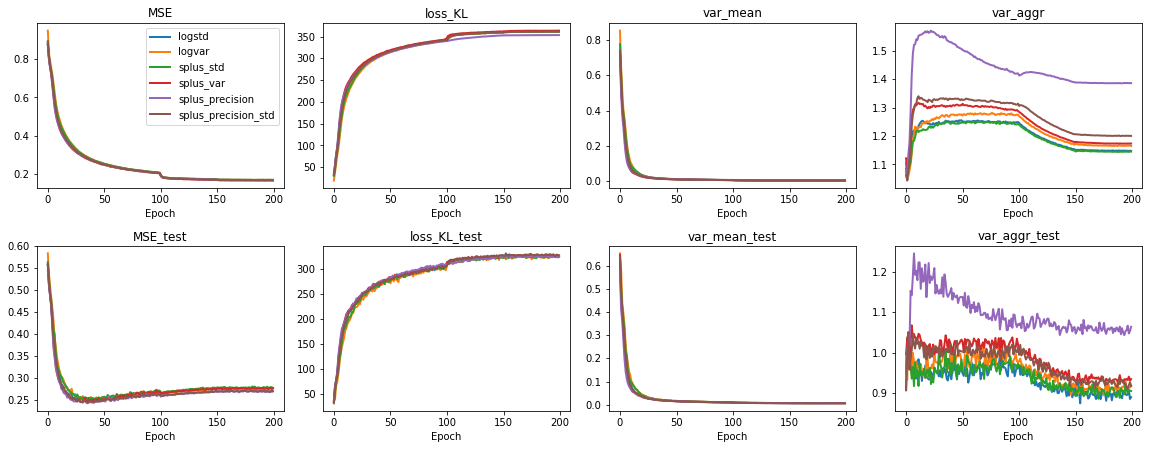

In [46]:
plot_lines(result, exps=[0,1,2,3,4,5], prop=['MSE', 'loss_KL', 'var_mean', 'var_aggr', 
                                             'MSE_test', 'loss_KL_test', 'var_mean_test', 'var_aggr_test'], label='var_channel')

Aggregated posterior:
$$Q(z) = \int Q(z|x)P(x) dx \overbrace{=}^{?} N(0,1)$$

# Variance of decoder
Decoder model $P(x|z) = N(f(z), I \sigma^2)$ has free parameter $\sigma^2$.
We study two options:
- Constant variance, i.e. $\sigma^2=1$
- Adaptive variance, based on Maximum Likelihood Estimation, $\sigma^2=MSE$

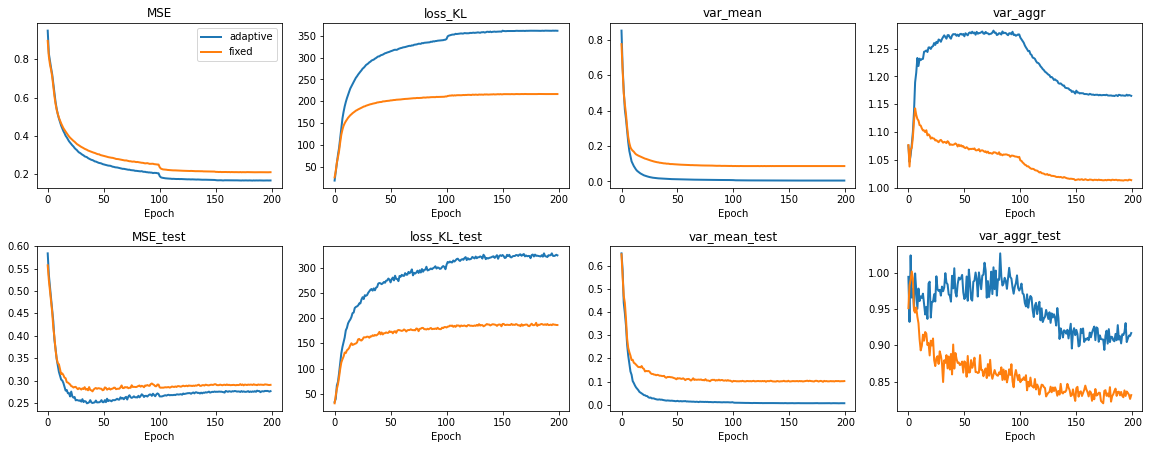

In [48]:
plot_lines(result, exps=[1, 6], prop=['MSE', 'loss_KL', 'var_mean', 'var_aggr', 
                                             'MSE_test', 'loss_KL_test', 'var_mean_test', 'var_aggr_test'], label='decoder_var')

# Number of training epochs

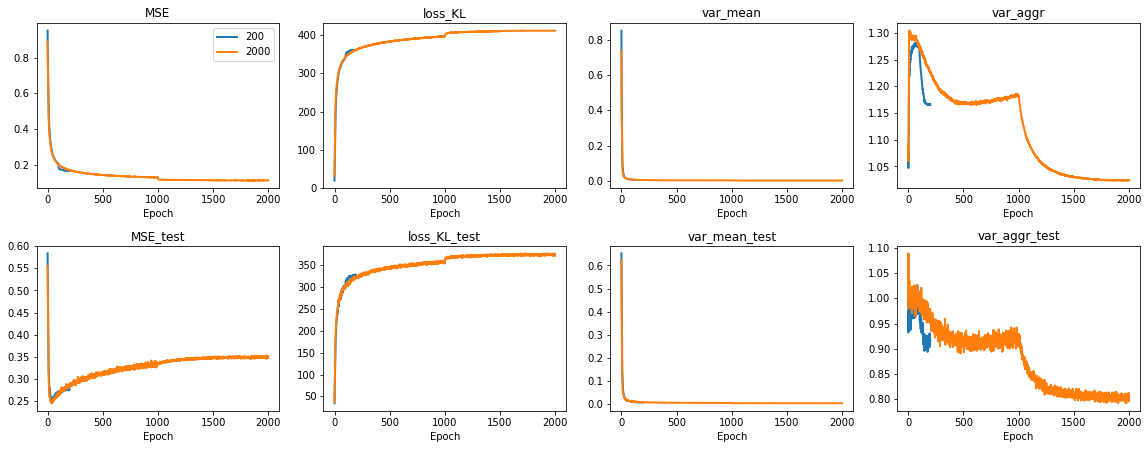

In [49]:
plot_lines(result, exps=[1, 9], prop=['MSE', 'loss_KL', 'var_mean', 'var_aggr', 
                                             'MSE_test', 'loss_KL_test', 'var_mean_test', 'var_aggr_test'], label='num_epochs')

# Dimensionality of latent space

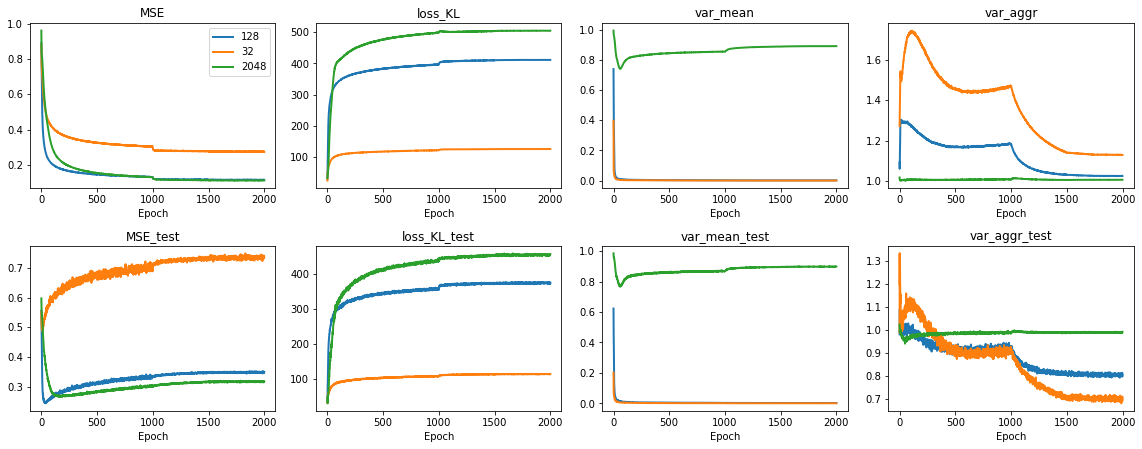

In [6]:
plot_lines(result, exps=[9, 7, 8], prop=['MSE', 'loss_KL', 'var_mean', 'var_aggr', 
                                             'MSE_test', 'loss_KL_test', 'var_mean_test', 'var_aggr_test'], label='n_latent')

# Power spectrum and PDF of generated images

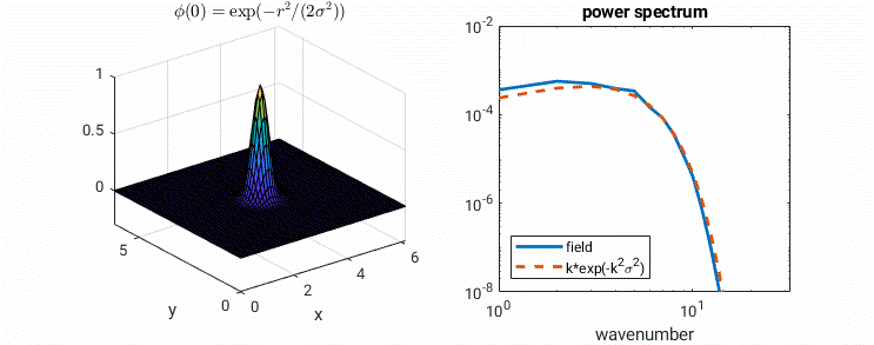

## Final transformation in encoder

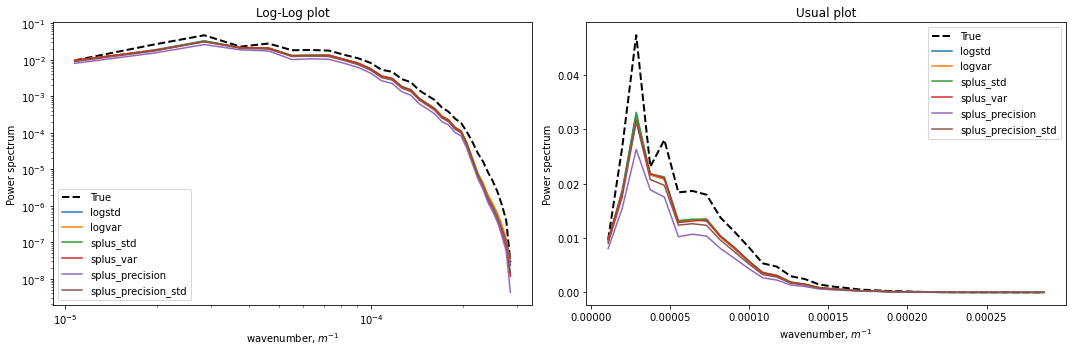

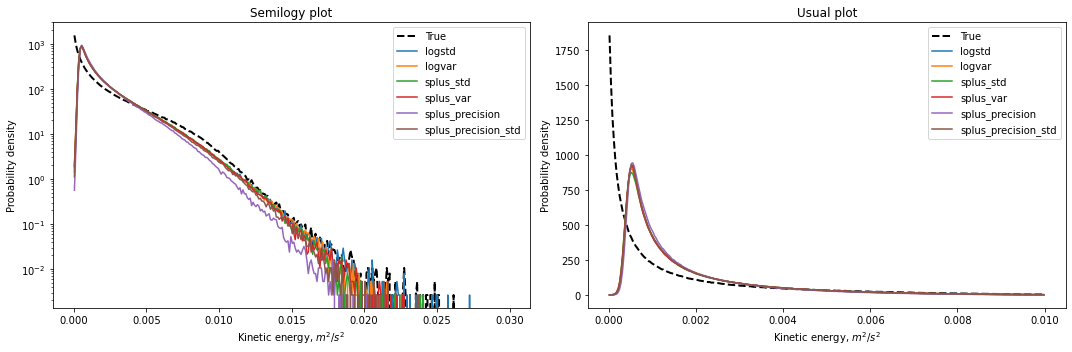

In [157]:
plot_spectra(result, [0,1,2,3,4,5], label='var_channel')
plot_PDF(result, [0,1,2,3,4,5], label='var_channel')

## Variance of decoder

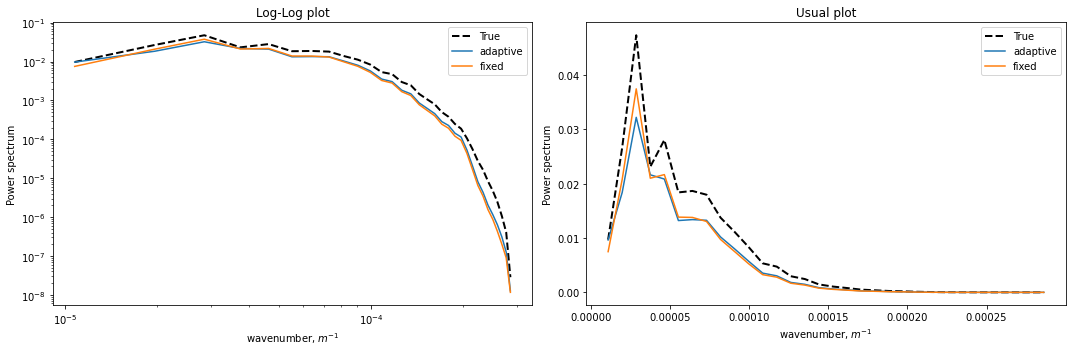

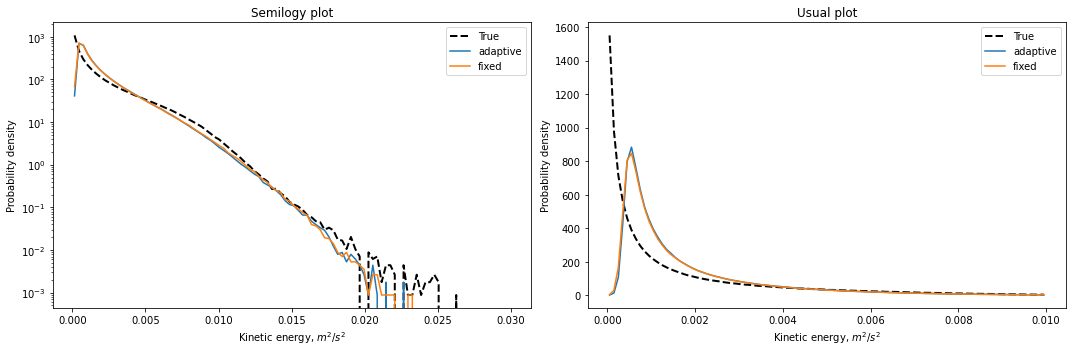

In [153]:
plot_spectra(result, [1,6], label='decoder_var')
plot_PDF(result, [1,6], label='decoder_var')

## Number of training epochs

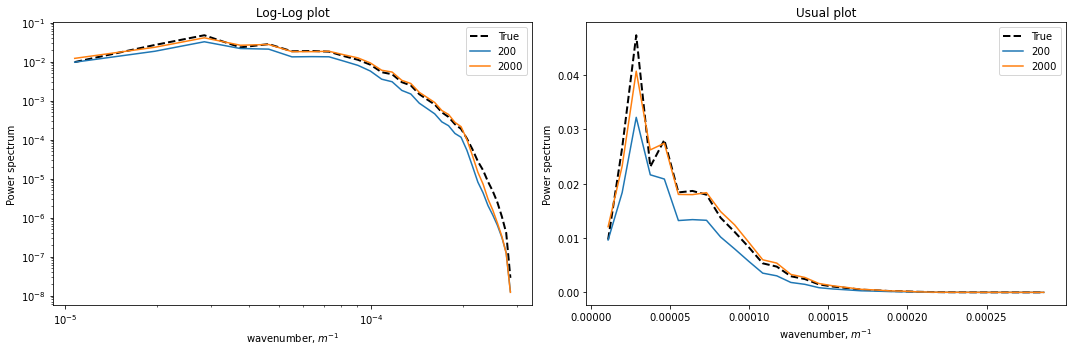

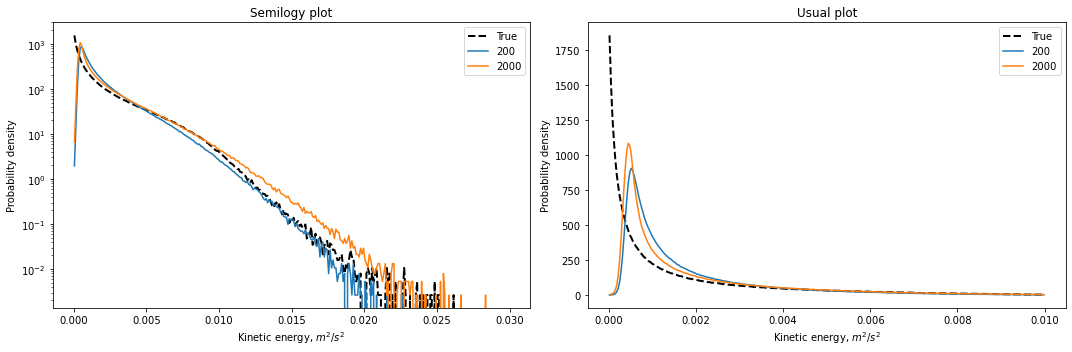

In [154]:
plot_spectra(result, [1,9], label='num_epochs')
plot_PDF(result, [1,9], label='num_epochs')

## Dimensionality of latent space

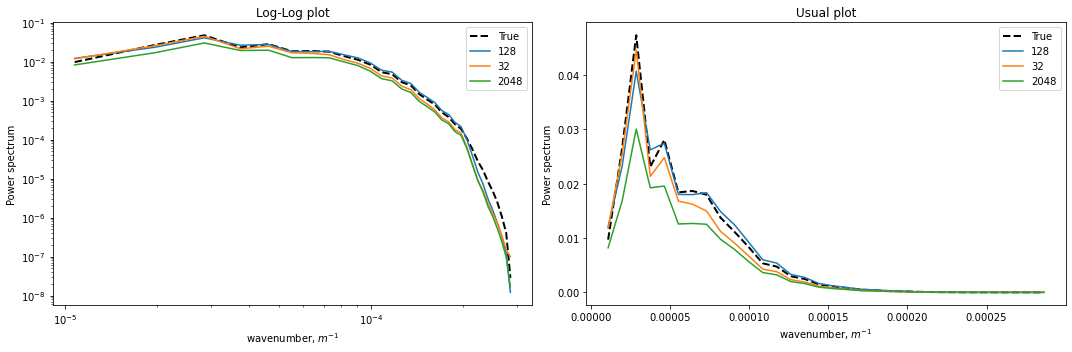

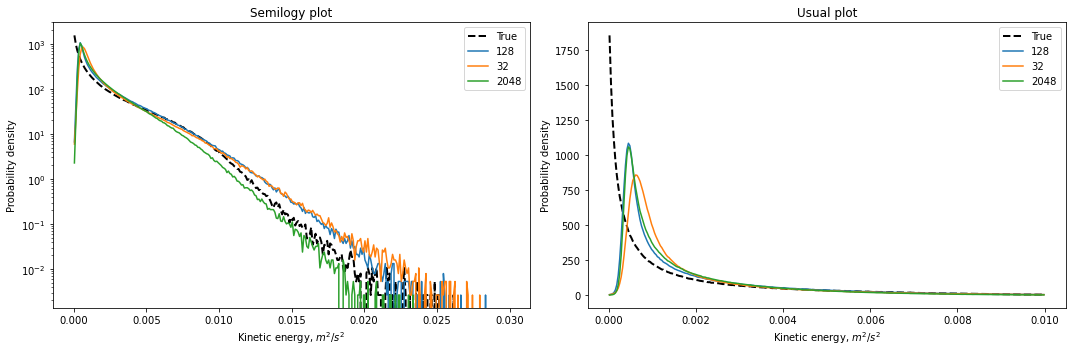

In [7]:
plot_spectra(result, [9,7,8], label='n_latent')
plot_PDF(result, [9,7,8], label='n_latent')

# Generative model for subgrid forces

In [2]:
folder = '/scratch/pp2681/pyqg_NN/q_forcing/'
exps = ('EXP1', 'EXP2', 'EXP3', 'EXP4')

In [3]:
result = []
for exp in exps:
    result.append(read_experiment(folder+exp))

for j, exp in enumerate(exps):
    print(exp, result[j]['args'])    
result[0]['vae'].net.log_dict.keys()

EXP1 {'n_latent': 128, 'num_epochs': 4000, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'folder': '.', 'input': 'q_forcing_advection', 'configuration': 'eddies'}
EXP2 {'n_latent': 2048, 'num_epochs': 4000, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'folder': '.', 'input': 'q_forcing_advection', 'configuration': 'eddies'}
EXP3 {'n_latent': 2048, 'num_epochs': 4000, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'folder': '.', 'input': 'q_forcing_advection', 'configuration': 'jets'}
EXP4 {'n_latent': 128, 'num_epochs': 4000, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'folder': '.', 'input': 'q_forcing_advection', 'configuration': 'jets'}


dict_keys(['var_aggr', 'MSE', 'loss_KL', 'loss', 'var_mean', 'loss_recon', 'loss_test', 'var_mean_test', 'loss_KL_test', 'MSE_test', 'loss_recon_test', 'var_aggr_test'])

# Eddies

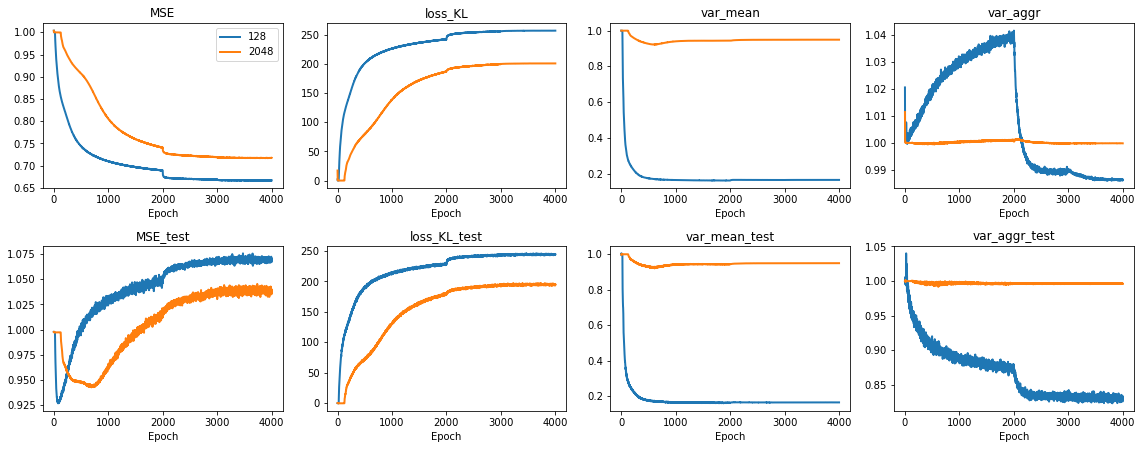

In [34]:
plot_lines(result, exps=[0,1], prop=['MSE', 'loss_KL', 'var_mean', 'var_aggr', 
                                             'MSE_test', 'loss_KL_test', 'var_mean_test', 'var_aggr_test'], label='n_latent')

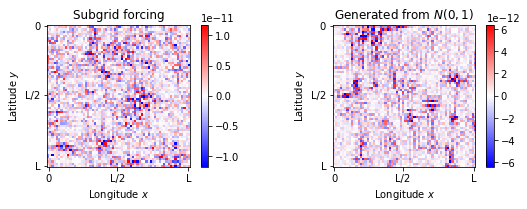

In [49]:
with pse.figure_grid(1,2) as g:
    g.next(title='Subgrid forcing')
    pse.imshow(result[0]['test']['q_forcing_advection'].isel(run=0,time=-1,lev=0))
    g.next(title='Generated from $N(0,1)$')
    pse.imshow(result[0]['test']['q_forcing_advection_gen'].isel(run=0,time=-1,lev=0))

Reconstruction!


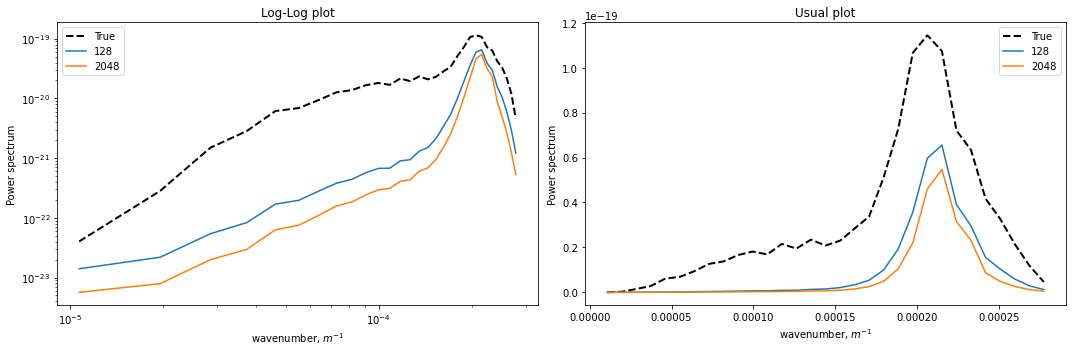

Reconstruction!


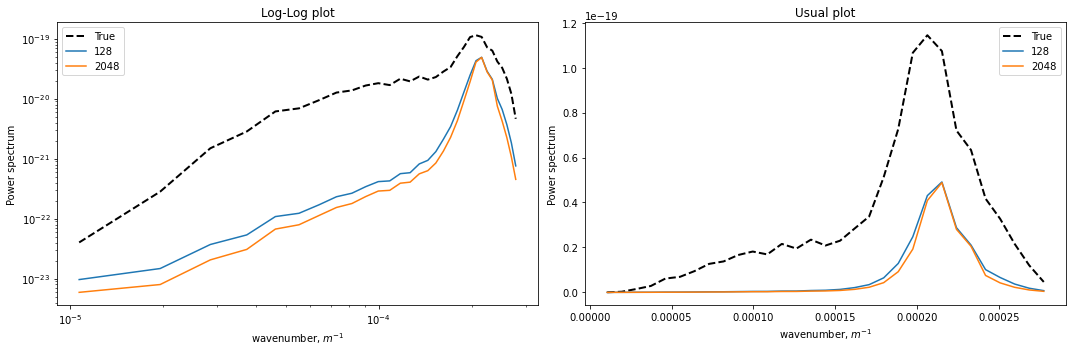

In [24]:
plot_spectra(result, [0,1], label='n_latent', variable='q_forcing_advection',suffix='_gen')
plot_spectra(result, [0,1], label='n_latent', variable='q_forcing_advection',suffix='_recon')
#plot_PDF(result, [0,1], label='n_latent', variable='q_forcing_advection')

# Jets

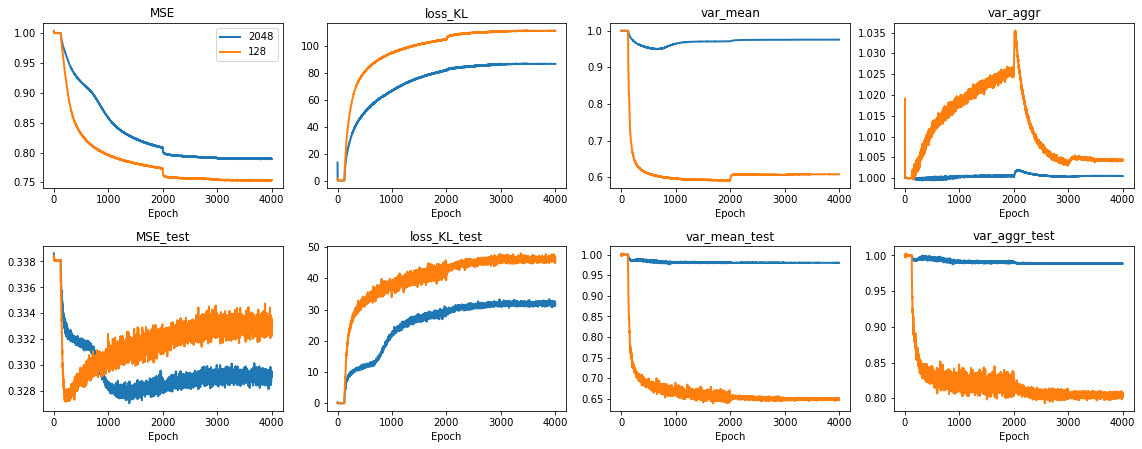

In [50]:
plot_lines(result, exps=[2,3], prop=['MSE', 'loss_KL', 'var_mean', 'var_aggr', 
                                             'MSE_test', 'loss_KL_test', 'var_mean_test', 'var_aggr_test'], label='n_latent')

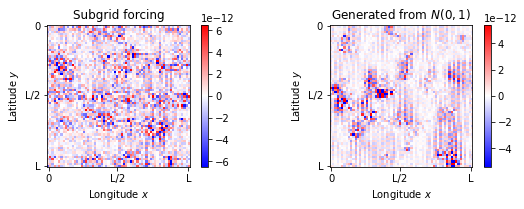

In [51]:
with pse.figure_grid(1,2) as g:
    g.next(title='Subgrid forcing')
    pse.imshow(result[2]['test']['q_forcing_advection'].isel(run=0,time=-1,lev=0))
    g.next(title='Generated from $N(0,1)$')
    pse.imshow(result[2]['test']['q_forcing_advection_gen'].isel(run=0,time=-1,lev=0))

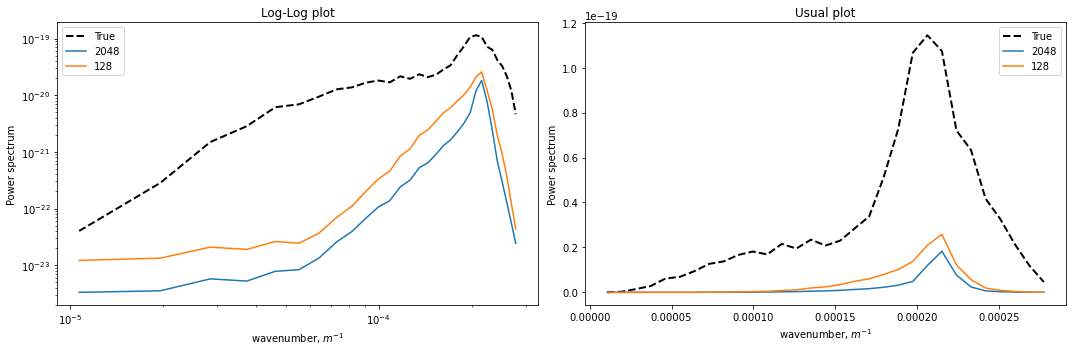

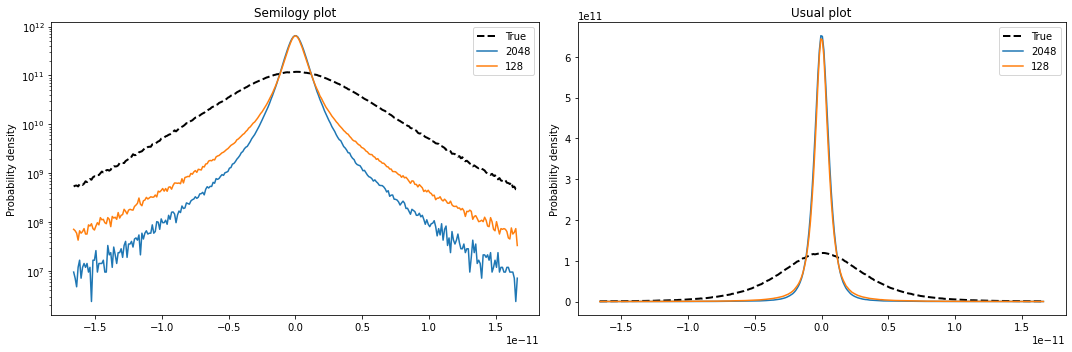

In [16]:
plot_spectra(result, [2,3], label='n_latent', variable='q_forcing_advection')
plot_PDF(result, [2,3], label='n_latent', variable='q_forcing_advection')

# Conditional VAE

In [2]:
folder = '/scratch/pp2681/pyqg_NN/CVAE/'
exps = ('EXP1','EXP2','EXP3', 'EXP4')

In [3]:
#vae = CVAEModel.load(folder+exps[2])
#trange = range(50,87) # exclude Laminar-turbulent transition
#test = pse.Dataset("/scratch/zanna/data/pyqg/data/test/*.nc").isel(time=trange)
#predict = vae.predict(test)
#predict.to_netcdf(folder+exps[2]+'/test.nc')

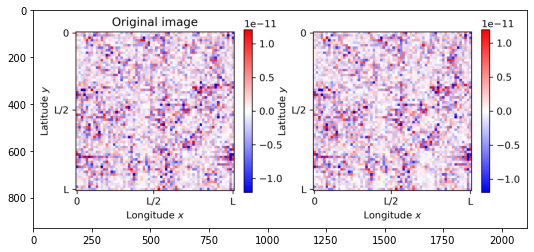

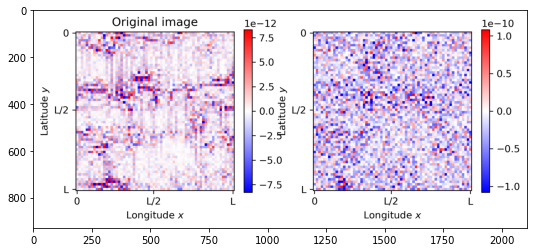

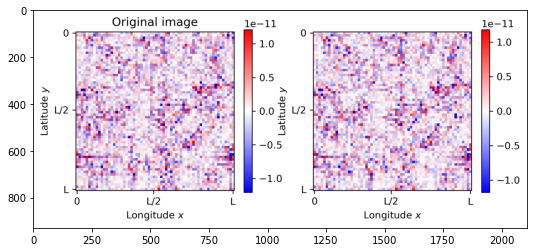

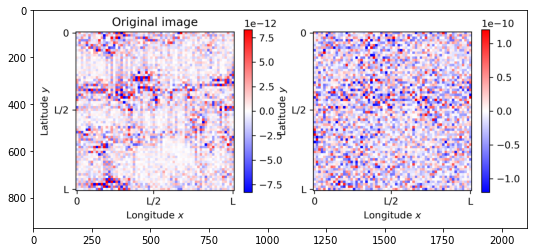

EXP1 {'n_latent': 32, 'num_epochs': 2000, 'var_channel': 'logvar', 'decoder_var': 'fixed', 'folder': '.', 'configuration': 'eddies'}
EXP2 {'n_latent': 32, 'num_epochs': 2000, 'var_channel': 'logvar', 'decoder_var': 'fixed', 'folder': '.', 'configuration': 'jets'}
EXP3 {'n_latent': 32, 'num_epochs': 2000, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'folder': '.', 'configuration': 'eddies'}
EXP4 {'n_latent': 32, 'num_epochs': 2000, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'folder': '.', 'configuration': 'jets'}


dict_keys(['MSE', 'loss', 'var_mean', 'loss_recon', 'var_aggr', 'loss_KL', 'var_mean_test', 'loss_recon_test', 'loss_KL_test', 'MSE_test', 'loss_test', 'var_aggr_test'])

In [4]:
result = []
for exp in exps:
    result.append(read_experiment(folder+exp,show_image=True))

for j, exp in enumerate(exps):
    print(exp, result[j]['args'])    
result[0]['vae'].net.log_dict.keys()

# Eddies

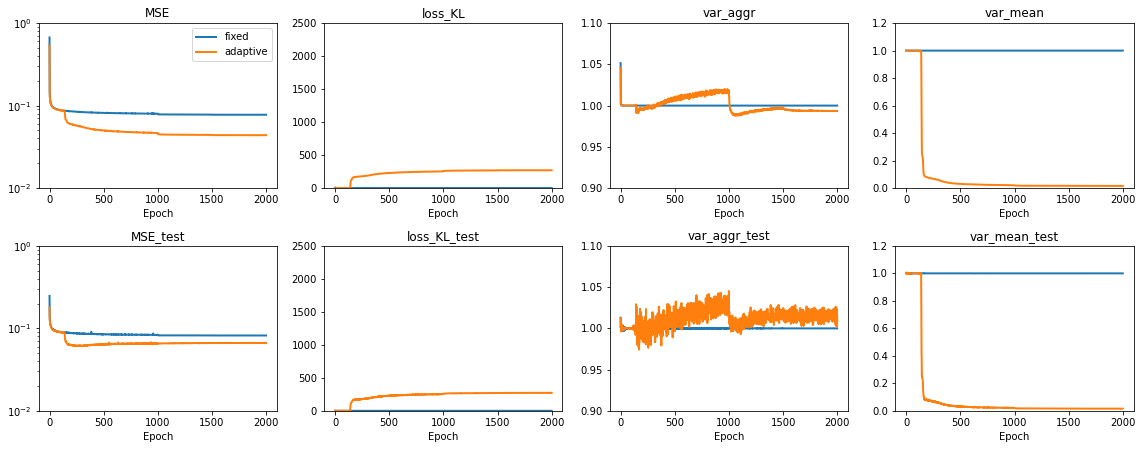

In [5]:
plot_lines(result, exps=[0,2], prop=['MSE', 'loss_KL', 'var_aggr', 'var_mean', 
                                             'MSE_test', 'loss_KL_test', 'var_aggr_test', 'var_mean_test'], label='decoder_var')

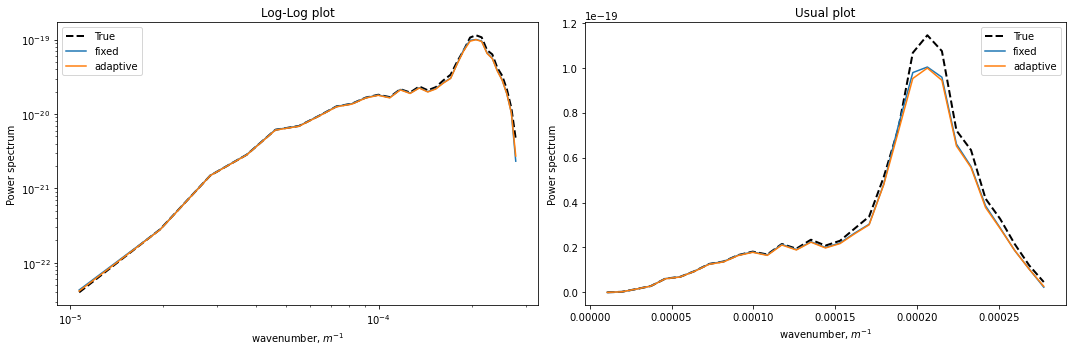

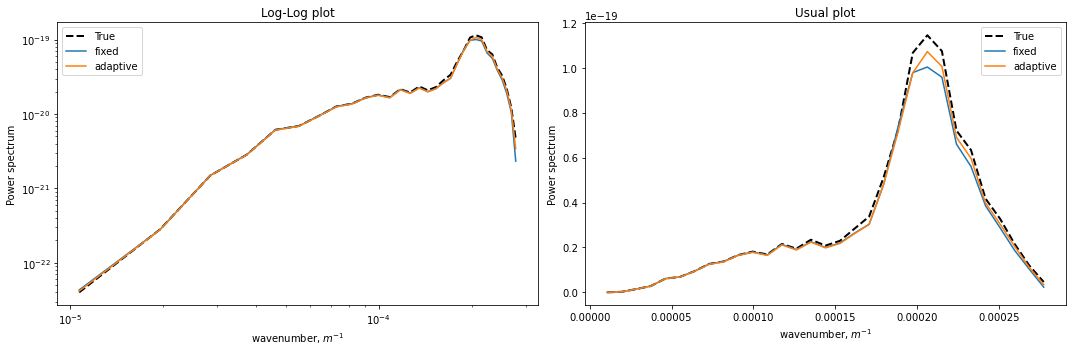

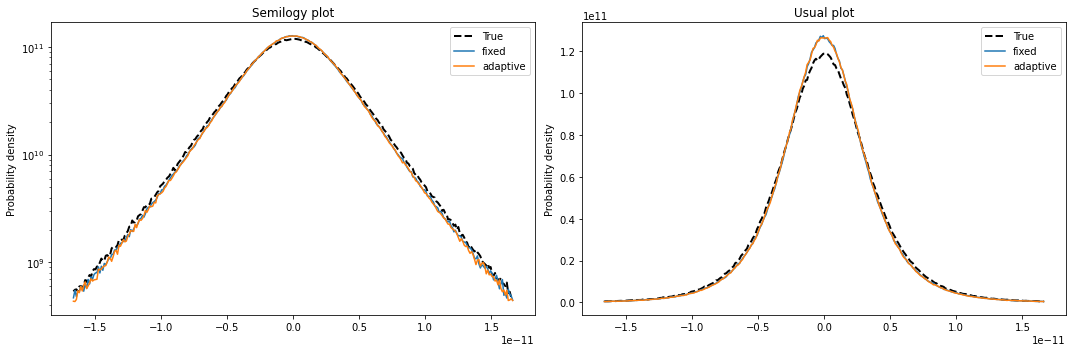

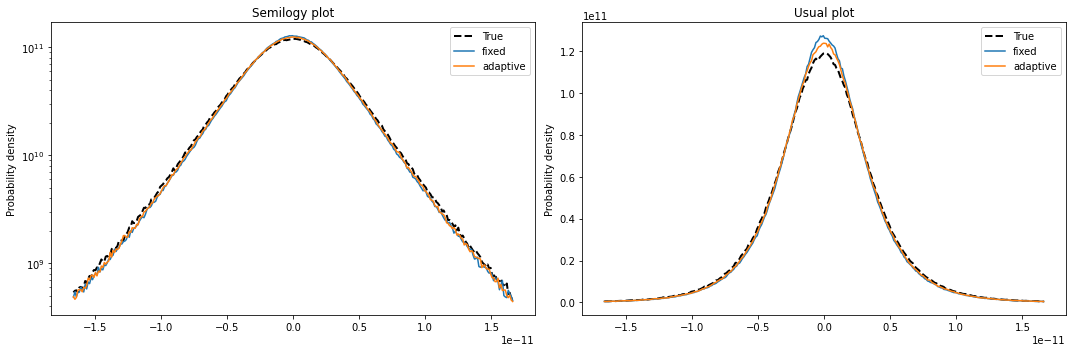

In [7]:
plot_spectra(result, [0,2], label='decoder_var', variable='q_forcing_advection', suffix='_gen')
plot_spectra(result, [0,2], label='decoder_var', variable='q_forcing_advection', suffix='_recon')
plot_PDF(result, [0,2], label='decoder_var', variable='q_forcing_advection', suffix='_gen')
plot_PDF(result, [0,2], label='decoder_var', variable='q_forcing_advection', suffix='_recon')

# Jets

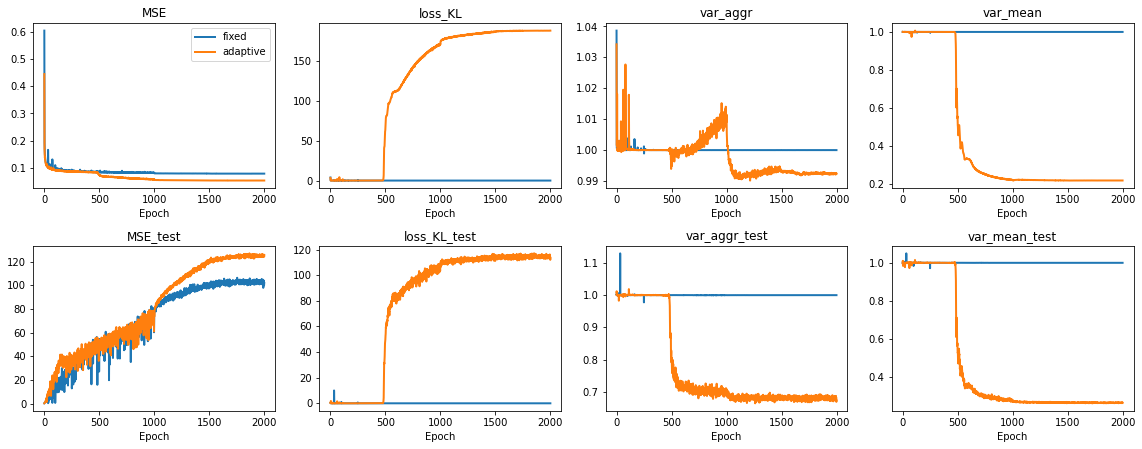

In [12]:
plot_lines(result, exps=[1,3], prop=['MSE', 'loss_KL', 'var_aggr', 'var_mean', 
                                             'MSE_test', 'loss_KL_test', 'var_aggr_test', 'var_mean_test'], label='decoder_var')

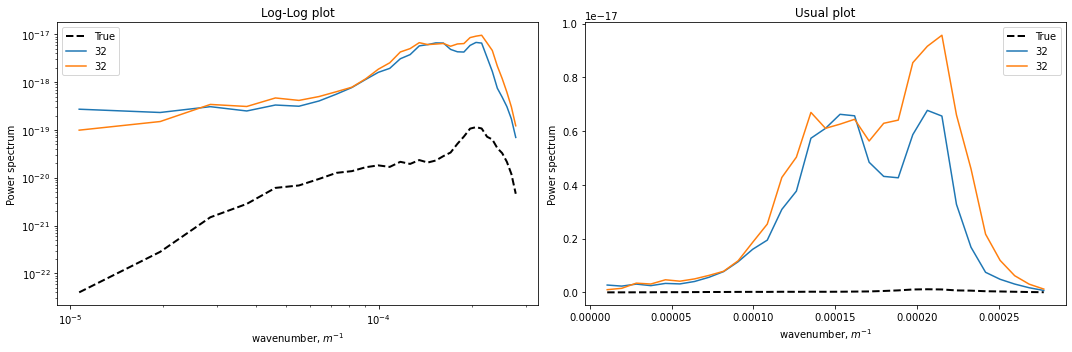

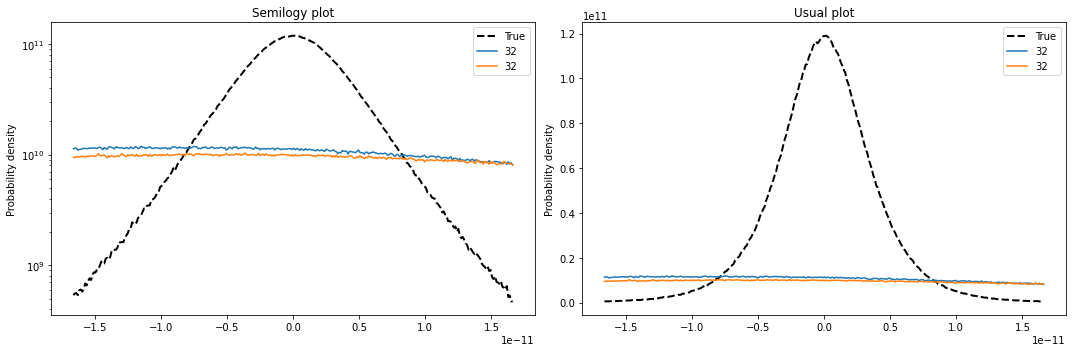

In [13]:
plot_spectra(result, [1,3], label='n_latent', variable='q_forcing_advection')
plot_PDF(result, [1,3], label='n_latent', variable='q_forcing_advection')

# Conditional GAN

In [2]:
folder = '/scratch/pp2681/pyqg_NN/CGAN/'
exps = ('EXP1','EXP2', 'EXP3', 'EXP4', 'EXP5', 'EXP6', 'EXP7', 'EXP8', 'EXP9', 'EXP10')

In [3]:
result = []
for exp in exps:
    result.append(read_experiment(folder+exp,show_image=False))

for j, exp in enumerate(exps):
    print(exp, result[j]['args'])    

EXP1 {'num_epochs': 200, 'ensemble_size': 100, 'folder': '.', 'configuration': 'eddies'}
EXP2 {'num_epochs': 200, 'ensemble_size': 100, 'folder': '.', 'configuration': 'eddies'}
EXP3 {'num_epochs': 200, 'ensemble_size': 100, 'folder': '.', 'configuration': 'eddies'}
EXP4 {'num_epochs': 200, 'ensemble_size': 100, 'folder': '.', 'configuration': 'eddies'}
EXP5 {'num_epochs': 200, 'ensemble_size': 100, 'folder': '.', 'configuration': 'eddies'}
EXP6 {'num_epochs': 200, 'ensemble_size': 100, 'folder': '.', 'configuration': 'eddies'}
EXP7 {'num_epochs': 200, 'ensemble_size': 100, 'folder': '.', 'configuration': 'eddies'}
EXP8 {'num_epochs': 200, 'ensemble_size': 100, 'folder': '.', 'configuration': 'eddies'}
EXP9 {'num_epochs': 200, 'ensemble_size': 100, 'folder': '.', 'configuration': 'eddies'}
EXP10 {'num_epochs': 200, 'ensemble_size': 100, 'folder': '.', 'configuration': 'eddies'}


Text(0.5, 0, 'Batch number')

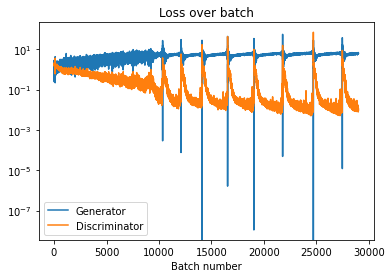

In [21]:
plt.semilogy(result[0]['vae'].net.G_losses)
plt.semilogy(result[0]['vae'].net.D_losses)
plt.legend(('Generator', 'Discriminator'))
plt.title('Loss over batch')
plt.xlabel('Batch number')

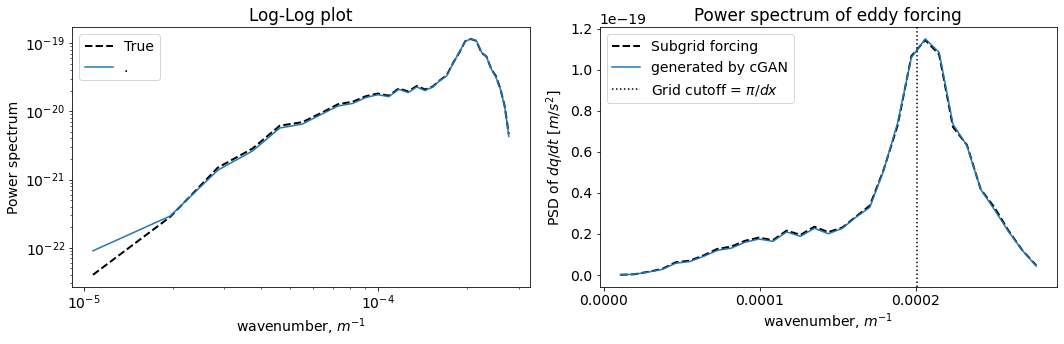

In [47]:
plot_spectra(result, [1], label='folder', variable='q_forcing_advection', suffix='_gen')
#plot_spectra(result, [0,1,2,3,4,5,6,7,8,9], label='folder', variable='q_forcing_advection', suffix='_gen_mean')

In [28]:
np.diff(result[0]['test'].x)

array([15625., 15625., 15625., 15625., 15625., 15625., 15625., 15625.,
       15625., 15625., 15625., 15625., 15625., 15625., 15625., 15625.,
       15625., 15625., 15625., 15625., 15625., 15625., 15625., 15625.,
       15625., 15625., 15625., 15625., 15625., 15625., 15625., 15625.,
       15625., 15625., 15625., 15625., 15625., 15625., 15625., 15625.,
       15625., 15625., 15625., 15625., 15625., 15625., 15625., 15625.,
       15625., 15625., 15625., 15625., 15625., 15625., 15625., 15625.,
       15625., 15625., 15625., 15625., 15625., 15625., 15625.],
      dtype=float32)

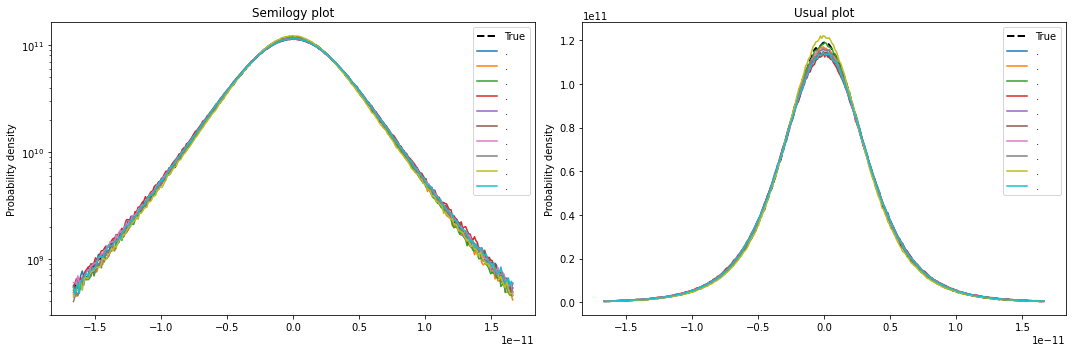

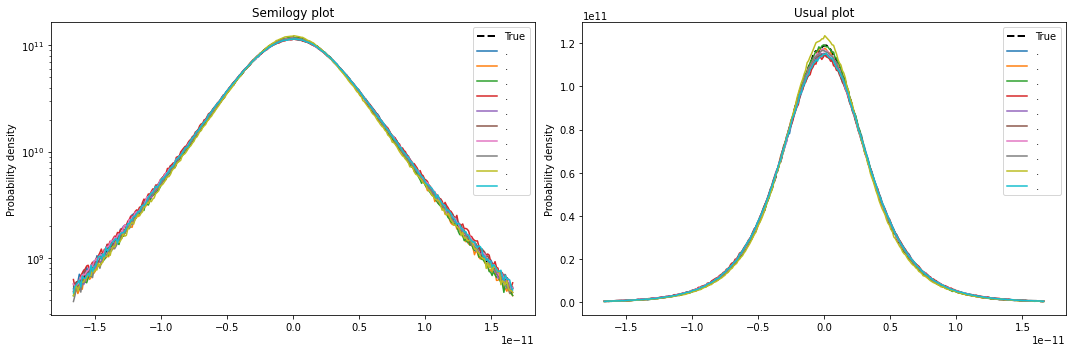

In [18]:
plot_PDF(result, [0,1,2,3,4,5,6,7,8,9], label='folder', variable='q_forcing_advection', suffix='_gen')
plot_PDF(result, [0,1,2,3,4,5,6,7,8,9], label='folder', variable='q_forcing_advection', suffix='_gen_mean')

# STD values approximately 4 times lower than should be

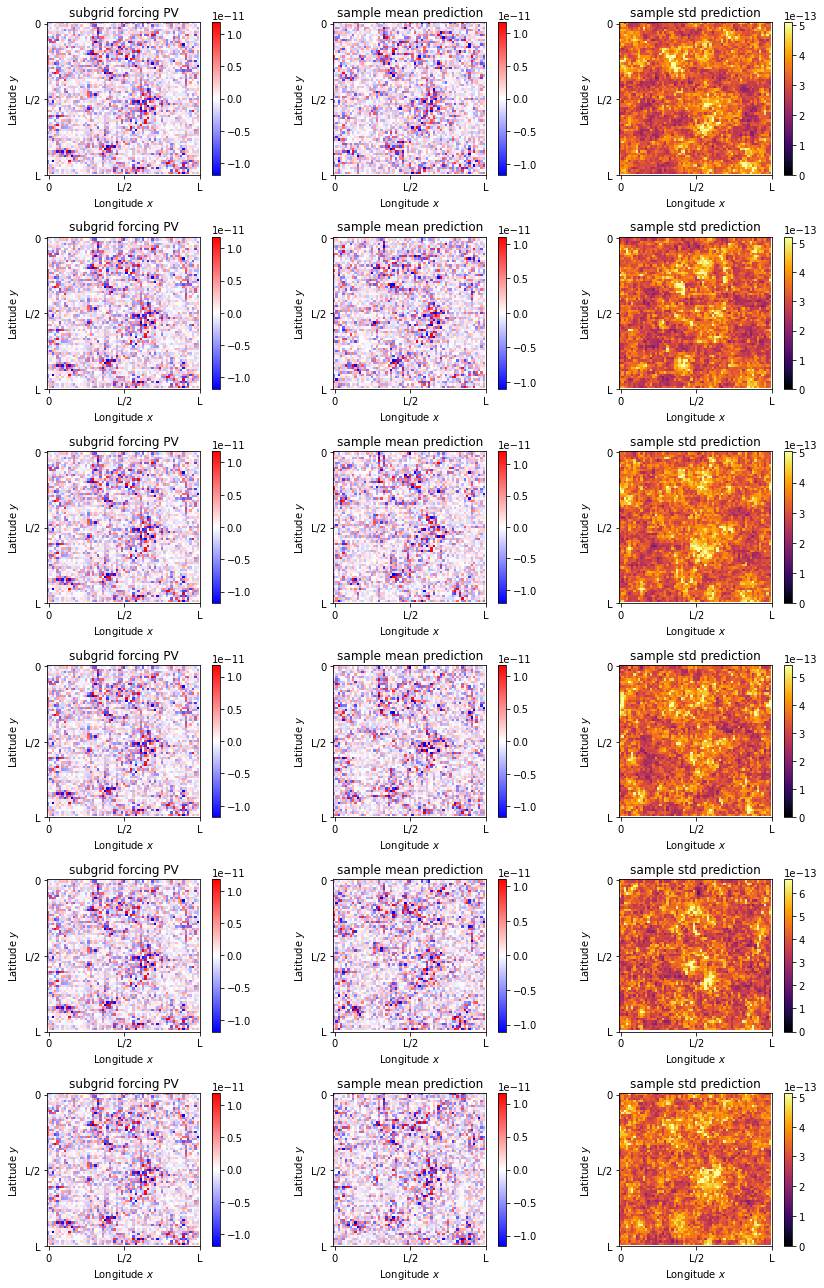

In [61]:
with pse.figure_grid(6,3) as g:
    for jfig in range(6):
        exp = result[jfig]['test']
        g.next('subgrid forcing PV')
        pse.imshow(exp.q_forcing_advection.isel(run=0,time=-1,lev=0))
        g.next('sample mean prediction')
        pse.imshow(exp.q_forcing_advection_gen_mean.isel(run=0,time=-1,lev=0))
        g.next('sample std prediction')
        pse.imshow(exp.q_forcing_advection_gen_std.isel(run=0,time=-1,lev=0))

# Properties
- Individual sample and conditional mean have the same statistical characteristics
- Mode collapse occured. Solution (High Perceptual Quality Image Denoising with a Posterior Sampling CGAN) https://openaccess.thecvf.com/content/ICCV2021W/AIM/papers/Ohayon_High_Perceptual_Quality_Image_Denoising_With_a_Posterior_Sampling_CGAN_ICCVW_2021_paper.pdf:

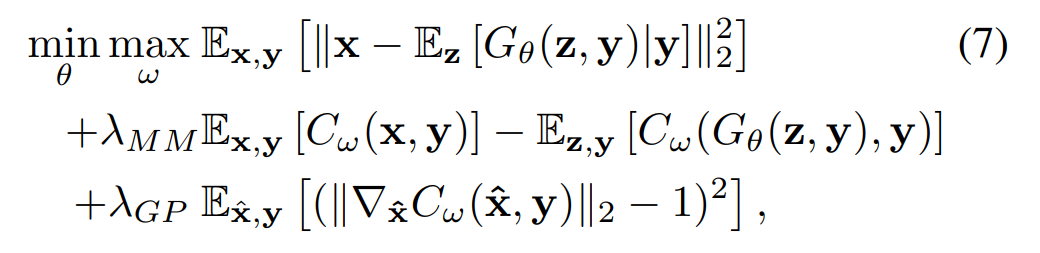

# CGAN. MSE regularization on $z=0$

In [4]:
folder = '/scratch/pp2681/pyqg_NN/CGAN_MSE/'
exps = ('EXP0', 'EXP1','EXP2', 'EXP3', 'EXP4', 'EXP5', 'EXP6', 'EXP7', 'EXP8', 'EXP9', 'EXP10')

In [5]:
result = []
for exp in exps:
    result.append(read_experiment(folder+exp,show_image=False))

for j, exp in enumerate(exps):
    print(exp, result[j]['args'])    

EXP0 {'num_epochs': 200, 'ensemble_size': 100, 'lambda_MSE': 0.0, 'folder': '.', 'configuration': 'eddies'}
EXP1 {'num_epochs': 200, 'ensemble_size': 100, 'lambda_MSE': 0.0001, 'folder': '.', 'configuration': 'eddies'}
EXP2 {'num_epochs': 200, 'ensemble_size': 100, 'lambda_MSE': 0.001, 'folder': '.', 'configuration': 'eddies'}
EXP3 {'num_epochs': 200, 'ensemble_size': 100, 'lambda_MSE': 0.01, 'folder': '.', 'configuration': 'eddies'}
EXP4 {'num_epochs': 200, 'ensemble_size': 100, 'lambda_MSE': 0.1, 'folder': '.', 'configuration': 'eddies'}
EXP5 {'num_epochs': 200, 'ensemble_size': 100, 'lambda_MSE': 1.0, 'folder': '.', 'configuration': 'eddies'}
EXP6 {'num_epochs': 200, 'ensemble_size': 100, 'lambda_MSE': 10.0, 'folder': '.', 'configuration': 'eddies'}
EXP7 {'num_epochs': 200, 'ensemble_size': 100, 'lambda_MSE': 100.0, 'folder': '.', 'configuration': 'eddies'}
EXP8 {'num_epochs': 200, 'ensemble_size': 100, 'lambda_MSE': 1000.0, 'folder': '.', 'configuration': 'eddies'}
EXP9 {'num_epoch

Text(0.5, 0, 'Batch number')

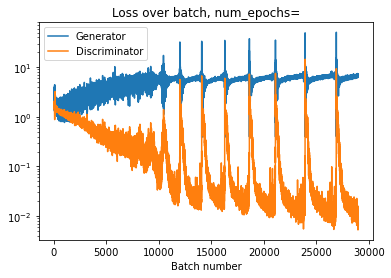

In [11]:
plt.semilogy(result[5]['vae'].net.G_losses)
plt.semilogy(result[5]['vae'].net.D_losses)
plt.legend(('Generator', 'Discriminator'))
plt.title('Loss over batch, num_epochs=')
plt.xlabel('Batch number')

In [14]:
result[5]['args']

{'num_epochs': 200,
 'ensemble_size': 100,
 'lambda_MSE': 1.0,
 'folder': '.',
 'configuration': 'eddies'}

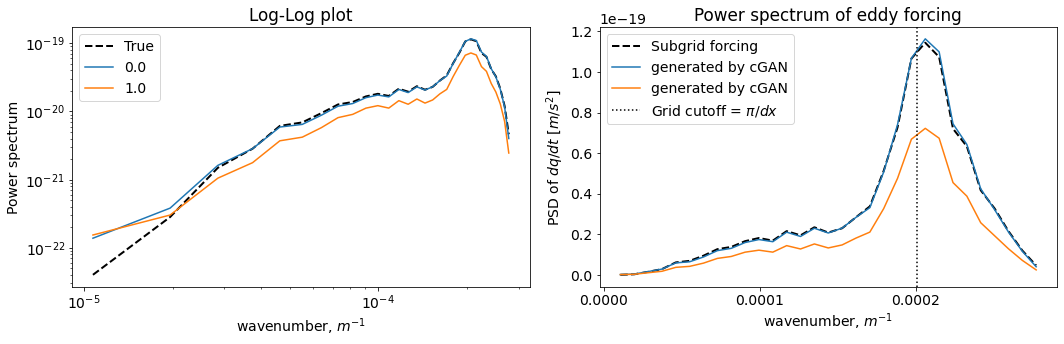

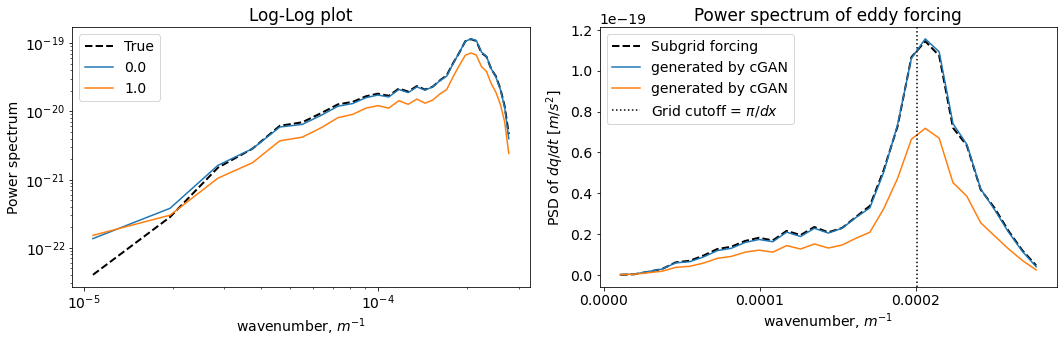

In [18]:
plot_spectra(result, [0,5], label='lambda_MSE', variable='q_forcing_advection', suffix='_gen')
plot_spectra(result, [0,5], label='lambda_MSE', variable='q_forcing_advection', suffix='_gen_mean')

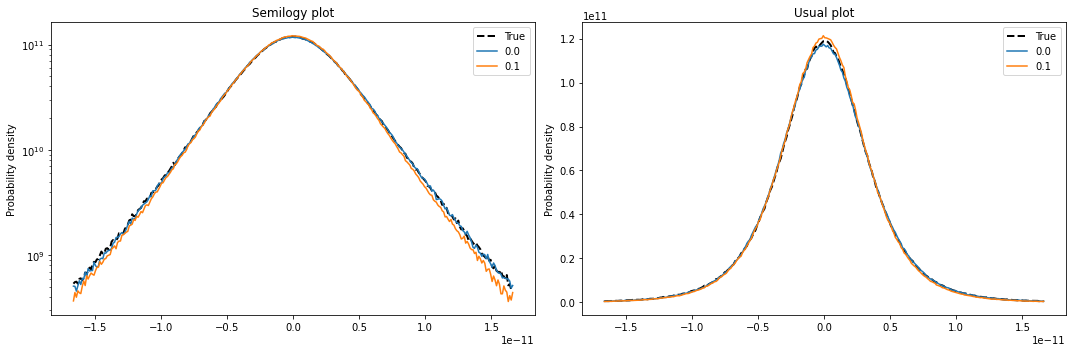

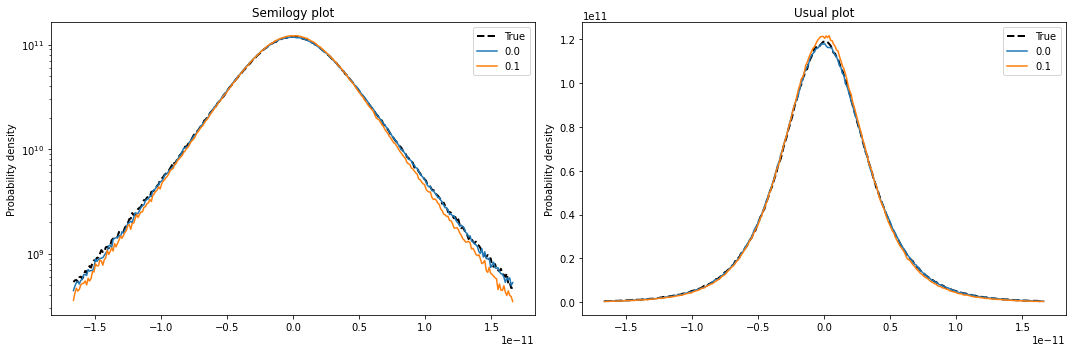

In [25]:
plot_PDF(result, [0,4], label='lambda_MSE', variable='q_forcing_advection', suffix='_gen')
plot_PDF(result, [0,4], label='lambda_MSE', variable='q_forcing_advection', suffix='_gen_mean')

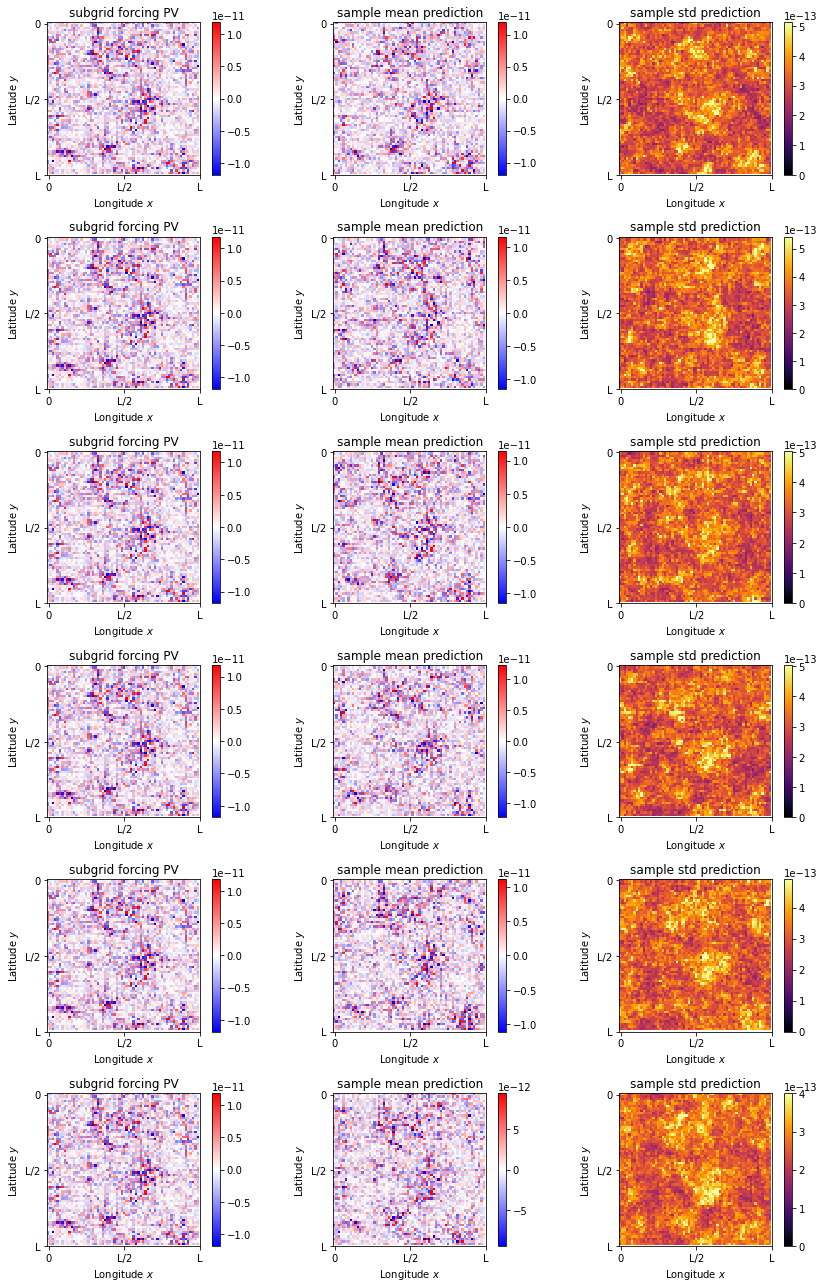

In [47]:
with pse.figure_grid(6,3) as g:
    for jfig in range(6):
        exp = result[jfig]['test']
        g.next('subgrid forcing PV')
        pse.imshow(exp.q_forcing_advection.isel(run=0,time=-1,lev=0))
        g.next('sample mean prediction')
        pse.imshow(exp.q_forcing_advection_gen_mean.isel(run=0,time=-1,lev=0))
        g.next('sample std prediction')
        pse.imshow(exp.q_forcing_advection_gen_std.isel(run=0,time=-1,lev=0))

# Flat CVAE

In [48]:
folder = '/scratch/pp2681/pyqg_NN/CVAE_Flat/'
exps = ('EXP1','EXP2', 'EXP3', 'EXP4', 'EXP5')

In [49]:
result = []
for exp in exps:
    result.append(read_experiment(folder+exp,show_image=False))

for j, exp in enumerate(exps):
    print(exp, result[j]['args'])    

EXP1 {'n_latent': 1, 'num_epochs': 200, 'ensemble_size': 100, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'folder': '.', 'configuration': 'eddies'}
EXP2 {'n_latent': 1, 'num_epochs': 200, 'ensemble_size': 100, 'var_channel': 'logvar', 'decoder_var': 'fixed', 'folder': '.', 'configuration': 'eddies'}
EXP3 {'n_latent': 1, 'num_epochs': 200, 'ensemble_size': 100, 'var_channel': 'splus_std', 'decoder_var': 'fixed', 'folder': '.', 'configuration': 'eddies'}
EXP4 {'n_latent': 1, 'num_epochs': 200, 'ensemble_size': 100, 'var_channel': 'splus_std', 'decoder_var': 'adaptive', 'folder': '.', 'configuration': 'eddies'}
EXP5 {'n_latent': 1, 'num_epochs': 500, 'ensemble_size': 100, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'folder': '.', 'configuration': 'eddies'}


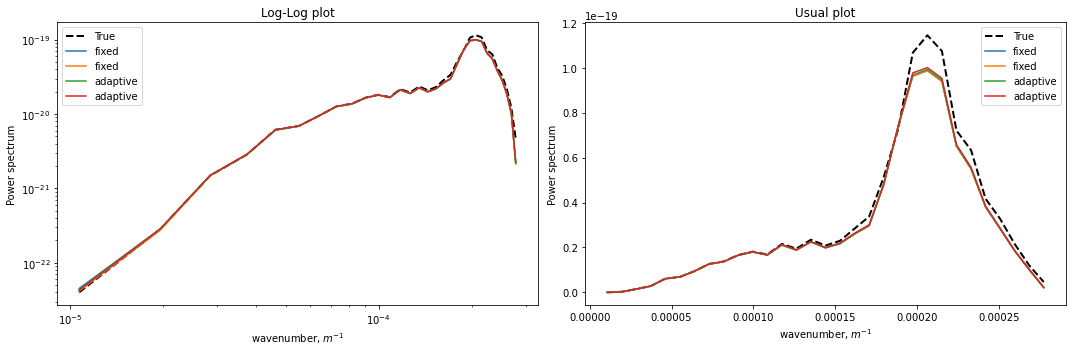

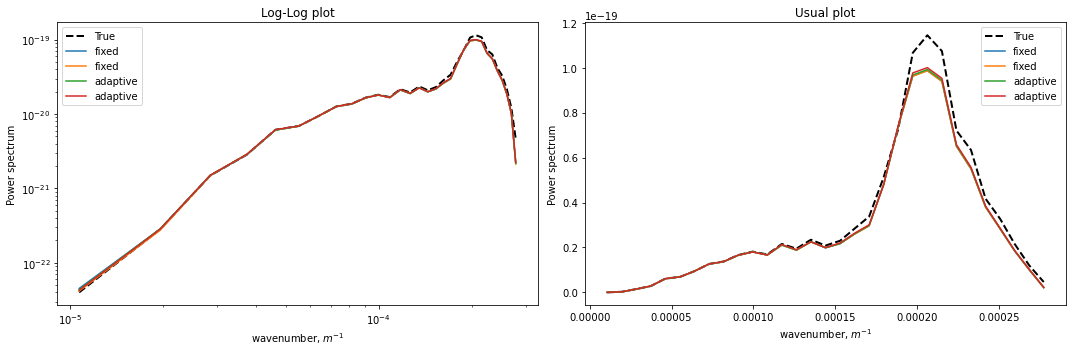

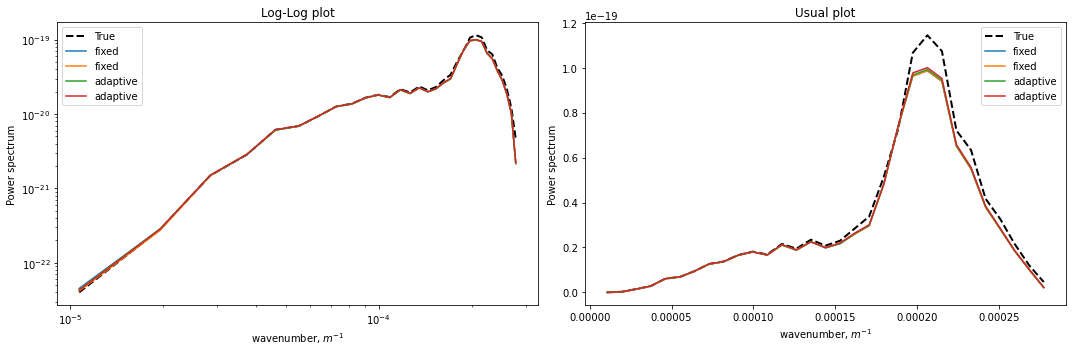

In [40]:
plot_spectra(result, [1,2,3,4], label='decoder_var', variable='q_forcing_advection', suffix='_gen')
plot_spectra(result, [1,2,3,4], label='decoder_var', variable='q_forcing_advection', suffix='_recon')
plot_spectra(result, [1,2,3,4], label='decoder_var', variable='q_forcing_advection', suffix='_gen_mean')

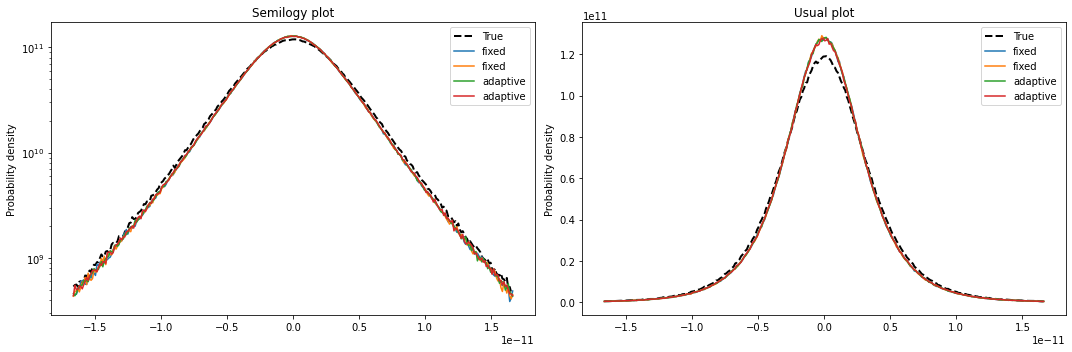

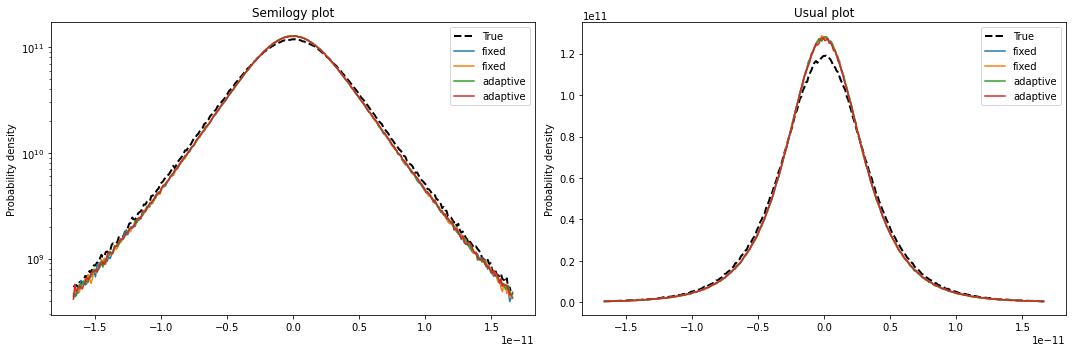

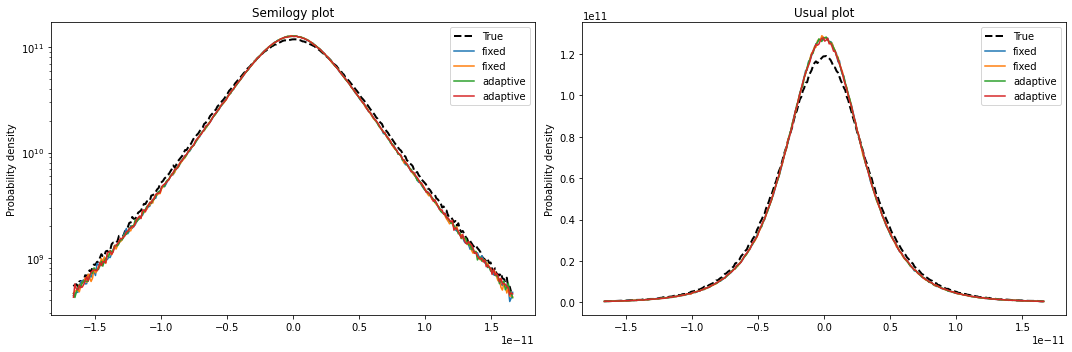

In [61]:
plot_PDF(result, [1,2,3,4], label='decoder_var', variable='q_forcing_advection', suffix='_gen')
plot_PDF(result, [1,2,3,4], label='decoder_var', variable='q_forcing_advection', suffix='_recon')
plot_PDF(result, [1,2,3,4], label='decoder_var', variable='q_forcing_advection', suffix='_gen_mean')

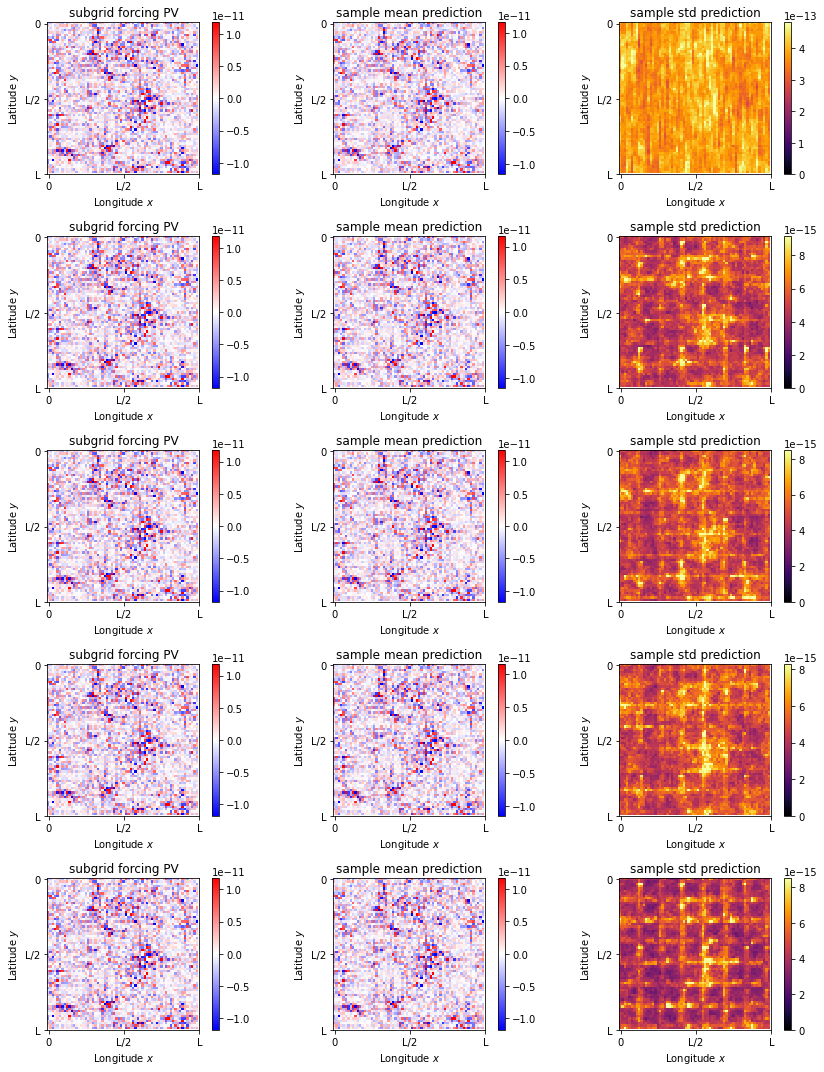

In [60]:
with pse.figure_grid(5,3) as g:
    for jfig in range(0,5):
        exp = result[jfig]['test']
        g.next('subgrid forcing PV')
        pse.imshow(exp.q_forcing_advection.isel(run=0,time=-1,lev=0))
        g.next('sample mean prediction')
        pse.imshow(exp.q_forcing_advection_gen_mean.isel(run=0,time=-1,lev=0))
        g.next('sample std prediction')
        pse.imshow(exp.q_forcing_advection_gen_std.isel(run=0,time=-1,lev=0))

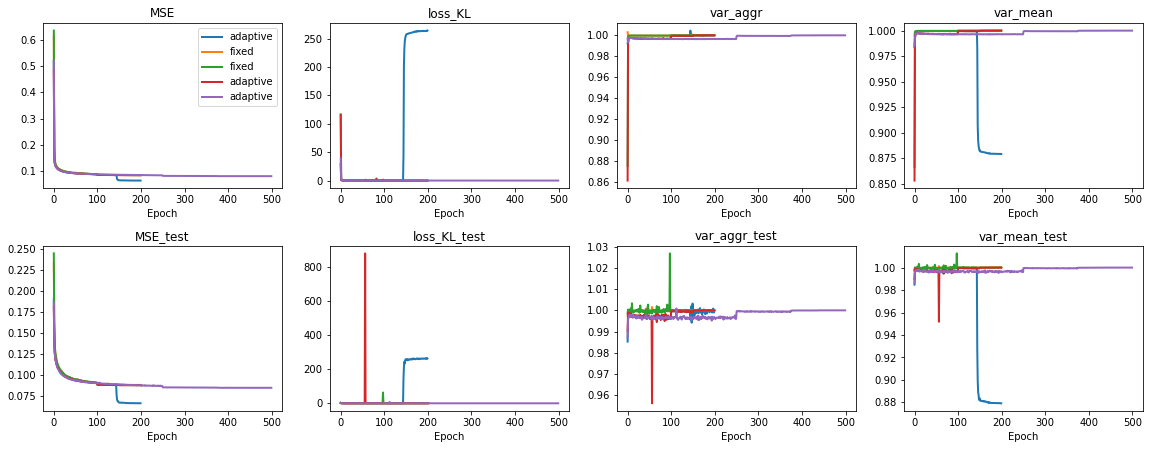

In [59]:
plot_lines(result, exps=[0,1,2,3,4], prop=['MSE', 'loss_KL', 'var_aggr', 'var_mean', 
                                             'MSE_test', 'loss_KL_test', 'var_aggr_test', 'var_mean_test'], label='decoder_var')

# Flat VAE long

In [2]:
folder = '/scratch/pp2681/pyqg_NN/CVAE_Flat_long/'
exps = ('EXP1','EXP5', 'EXP6', 'EXP7', 'EXP8', 'EXP9', 'EXP10')

In [4]:
result = []
for exp in exps:
    result.append(read_experiment(folder+exp,show_image=False))

for j, exp in enumerate(exps):
    print(exp, result[j]['args'])    

EXP1 {'n_latent': 1, 'num_epochs': 3000, 'ensemble_size': 100, 'learning_rate': 0.001, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'small_weights': False, 'folder': '.', 'configuration': 'eddies'}
EXP5 {'n_latent': 1, 'num_epochs': 3000, 'ensemble_size': 100, 'learning_rate': 0.0002, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'small_weights': False, 'folder': '.', 'configuration': 'eddies'}
EXP6 {'n_latent': 1, 'num_epochs': 3000, 'ensemble_size': 100, 'learning_rate': 0.0002, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'small_weights': False, 'folder': '.', 'configuration': 'eddies'}
EXP7 {'n_latent': 1, 'num_epochs': 3000, 'ensemble_size': 100, 'learning_rate': 0.0001, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'small_weights': False, 'folder': '.', 'configuration': 'eddies'}
EXP8 {'n_latent': 1, 'num_epochs': 3000, 'ensemble_size': 100, 'learning_rate': 0.0001, 'var_channel': 'logvar', 'decoder_var': 'adaptive', 'small_weights': False, 'folder': '.'

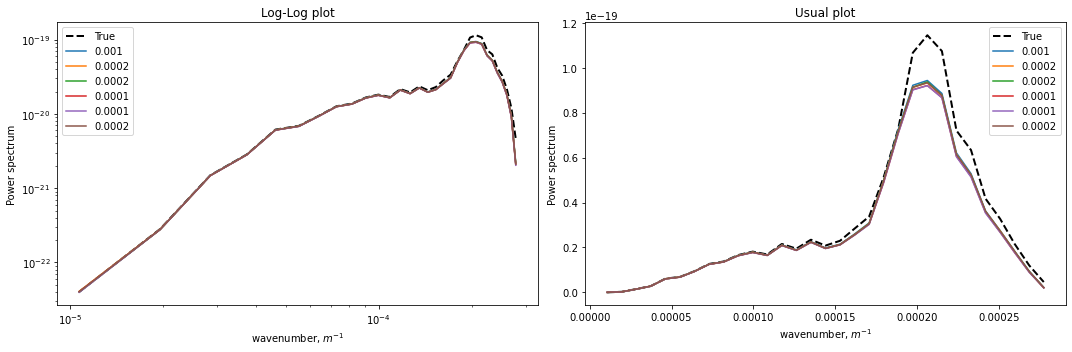

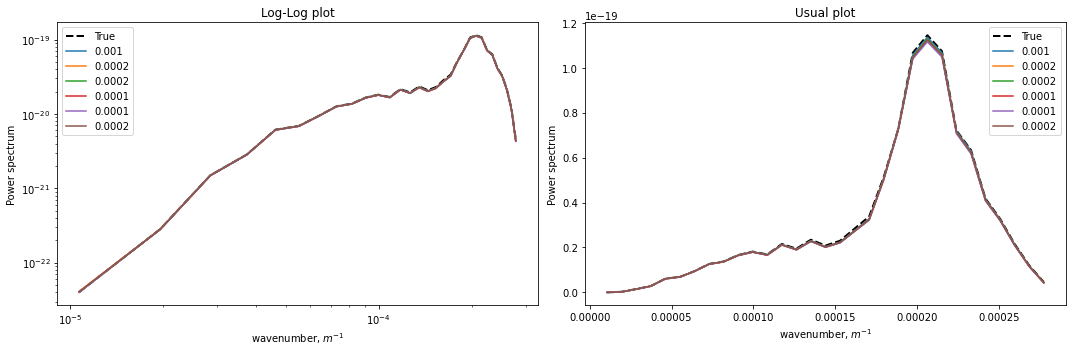

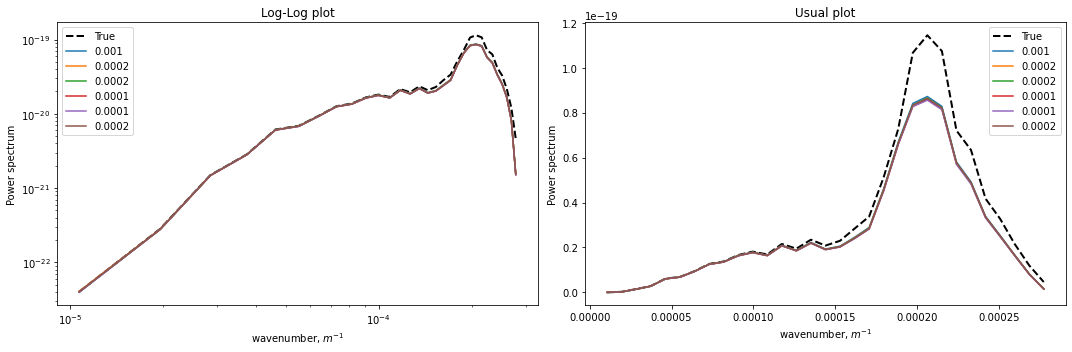

In [16]:
plot_spectra(result, [0,1,2,3,4,5], label='learning_rate', variable='q_forcing_advection', suffix='_gen')
plot_spectra(result, [0,1,2,3,4,5], label='learning_rate', variable='q_forcing_advection', suffix='_recon')
plot_spectra(result, [0,1,2,3,4,5], label='learning_rate', variable='q_forcing_advection', suffix='_gen_mean')

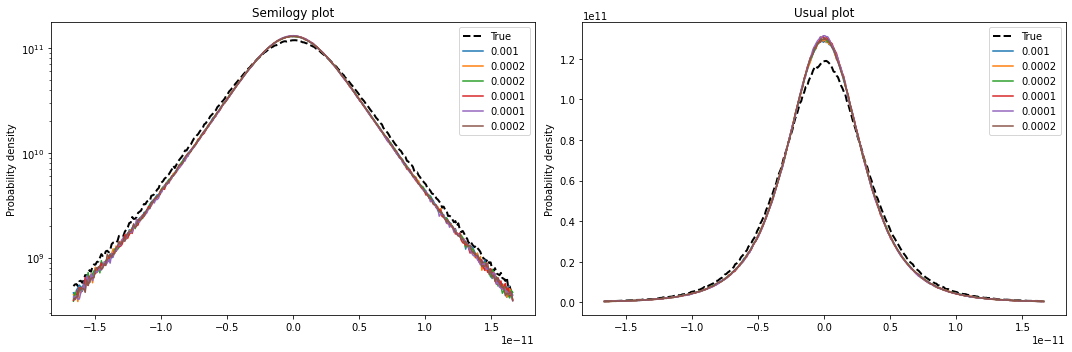

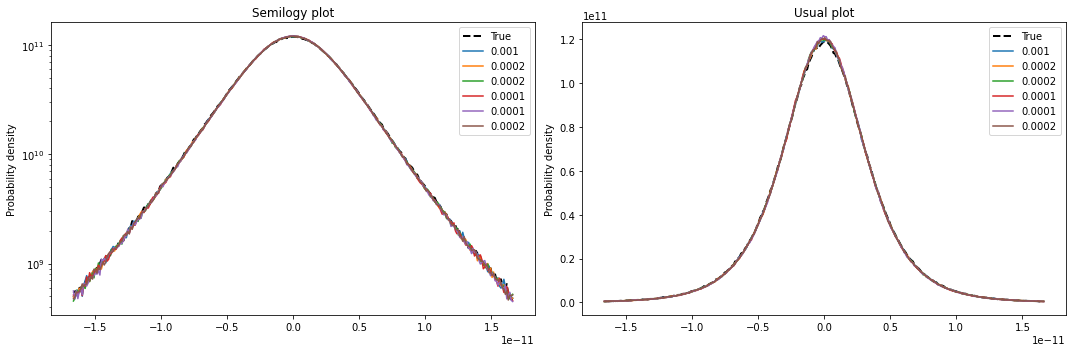

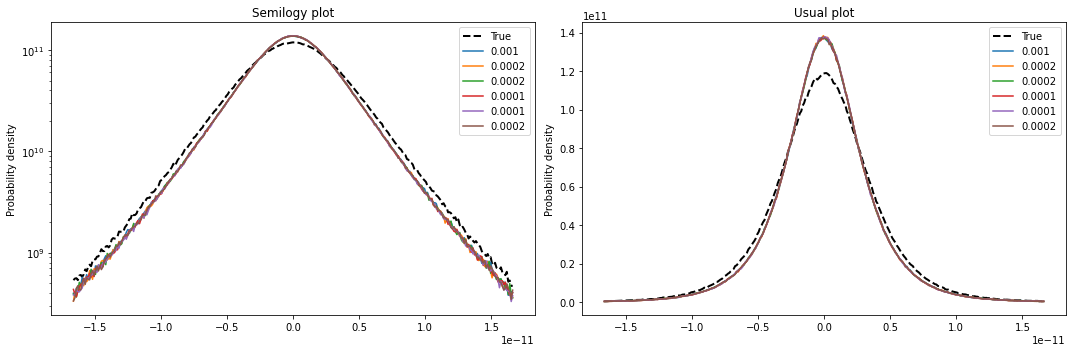

In [19]:
plot_PDF(result, [0,1,2,3,4,5], label='learning_rate', variable='q_forcing_advection', suffix='_gen')
plot_PDF(result, [0,1,2,3,4,5], label='learning_rate', variable='q_forcing_advection', suffix='_recon')
plot_PDF(result, [0,1,2,3,4,5], label='learning_rate', variable='q_forcing_advection', suffix='_gen_mean')

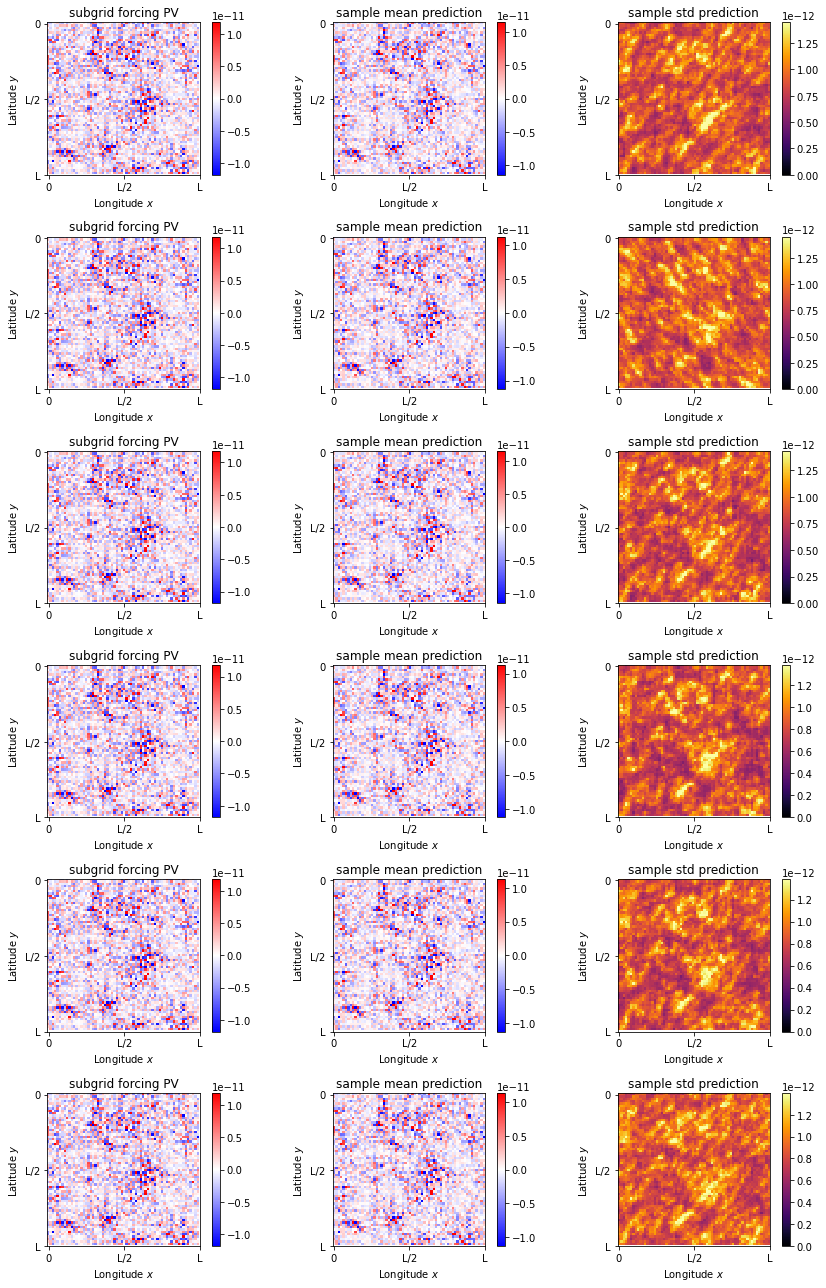

In [21]:
with pse.figure_grid(6,3) as g:
    for jfig in range(0,6):
        exp = result[jfig]['test']
        g.next('subgrid forcing PV')
        pse.imshow(exp.q_forcing_advection.isel(run=0,time=-1,lev=0))
        g.next('sample mean prediction')
        pse.imshow(exp.q_forcing_advection_gen_mean.isel(run=0,time=-1,lev=0))
        g.next('sample std prediction')
        pse.imshow(exp.q_forcing_advection_gen_std.isel(run=0,time=-1,lev=0))

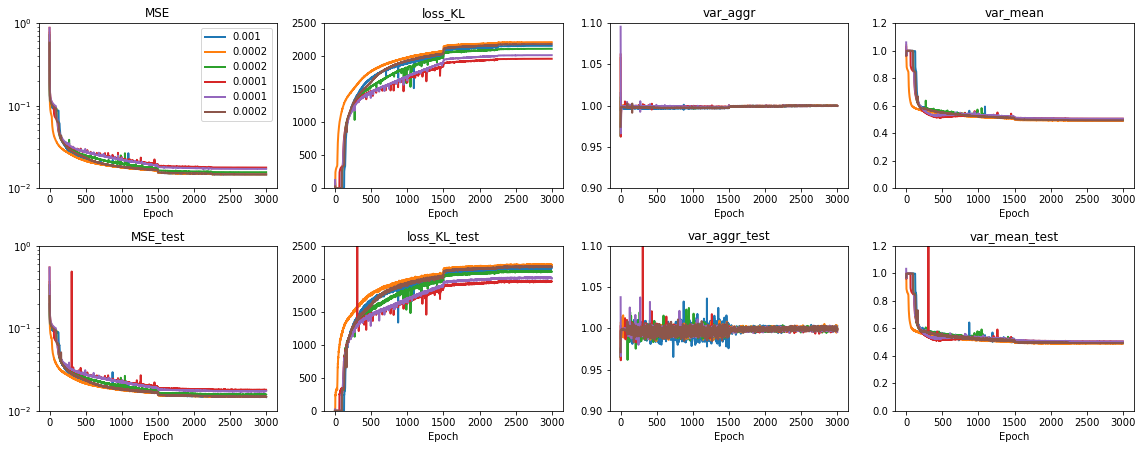

In [32]:
plot_lines(result, exps=[0,1,2,3,4,5], prop=['MSE', 'loss_KL', 'var_aggr', 'var_mean', 
                                             'MSE_test', 'loss_KL_test', 'var_aggr_test', 'var_mean_test'], label='learning_rate')